<h1><u><i> DATASET ROSE

In [418]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set()
from IPython.display import display

In [419]:
rdf = pd.read_csv("Rose.csv")

# Data definition

In [420]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [421]:
rdf.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


# Data description


In [422]:
rdf.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [423]:
rdf.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [424]:
rdf[rdf["Rose"].isnull()]

,YearMonth,Rose
174,1994-07,NaN
175,1994-08,NaN


In [425]:
rdf = rdf.interpolate()

In [426]:
rdf[rdf["Rose"].isnull()]

,YearMonth,Rose


## Organize dataset

In [427]:
Date = pd.date_range(start="1980-01-01", periods=187, freq="M")
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [428]:
rdf["Date"] = Date

In [429]:
rdf.drop("YearMonth", axis=1, inplace=True)

In [430]:
rdf.set_index("Date", inplace=True)

In [431]:
rdf.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [432]:
rdf.index.freq = "M"

# Time series plot

In [433]:
from pylab import rcParams # or we can write plt.rcParams['figure.figsize'] = 15,8
rcParams['figure.figsize'] = 15,8

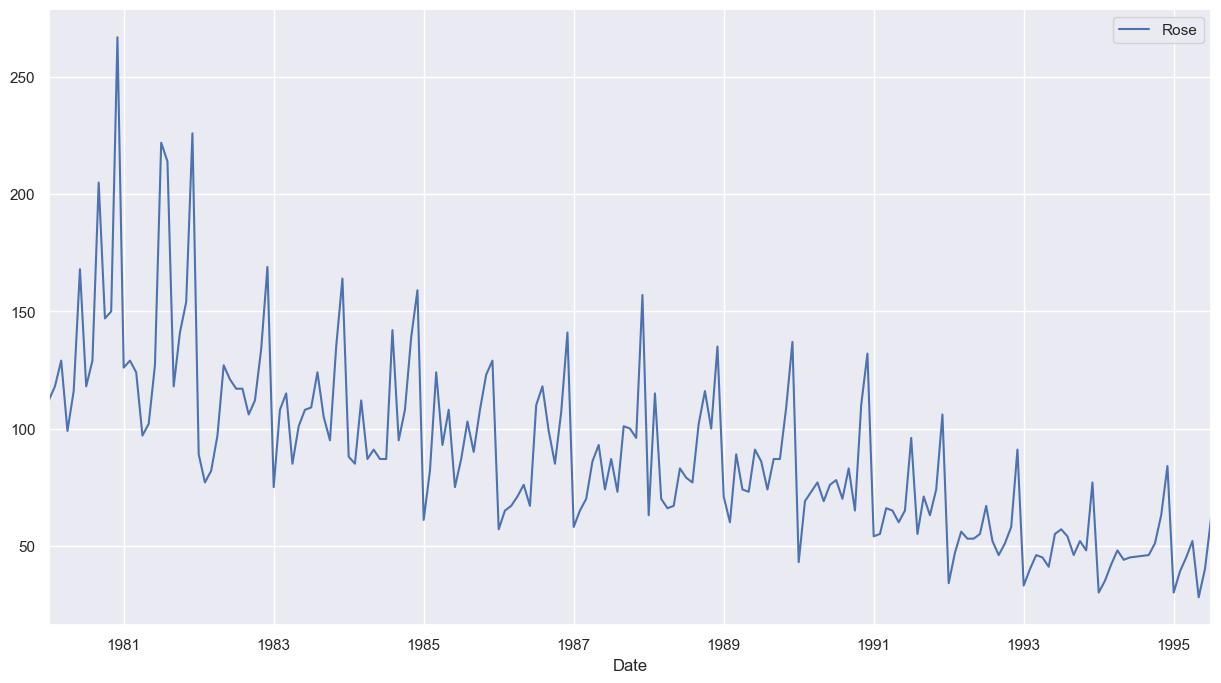

In [434]:
rdf.plot()
plt.show()

# Box plot

## Yearly box plot

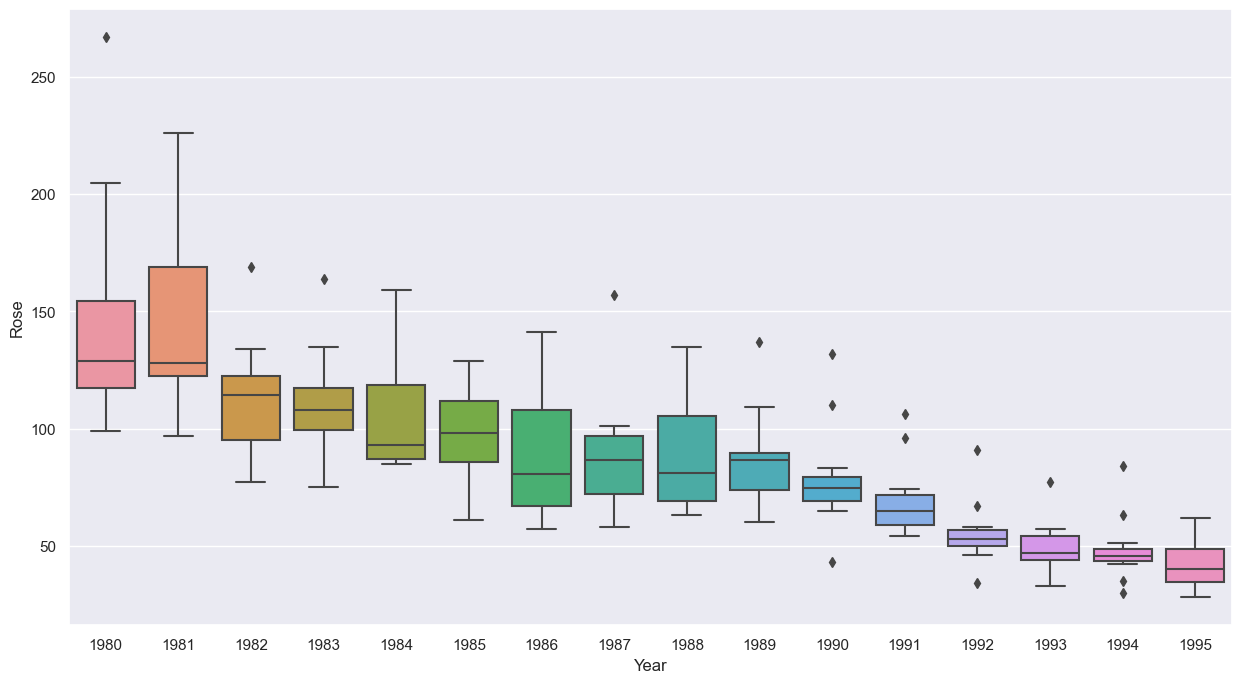

In [435]:
sns.boxplot(x = rdf.index.year, y = rdf["Rose"])
plt.xlabel('Year')
plt.show()

## Monthly box plot

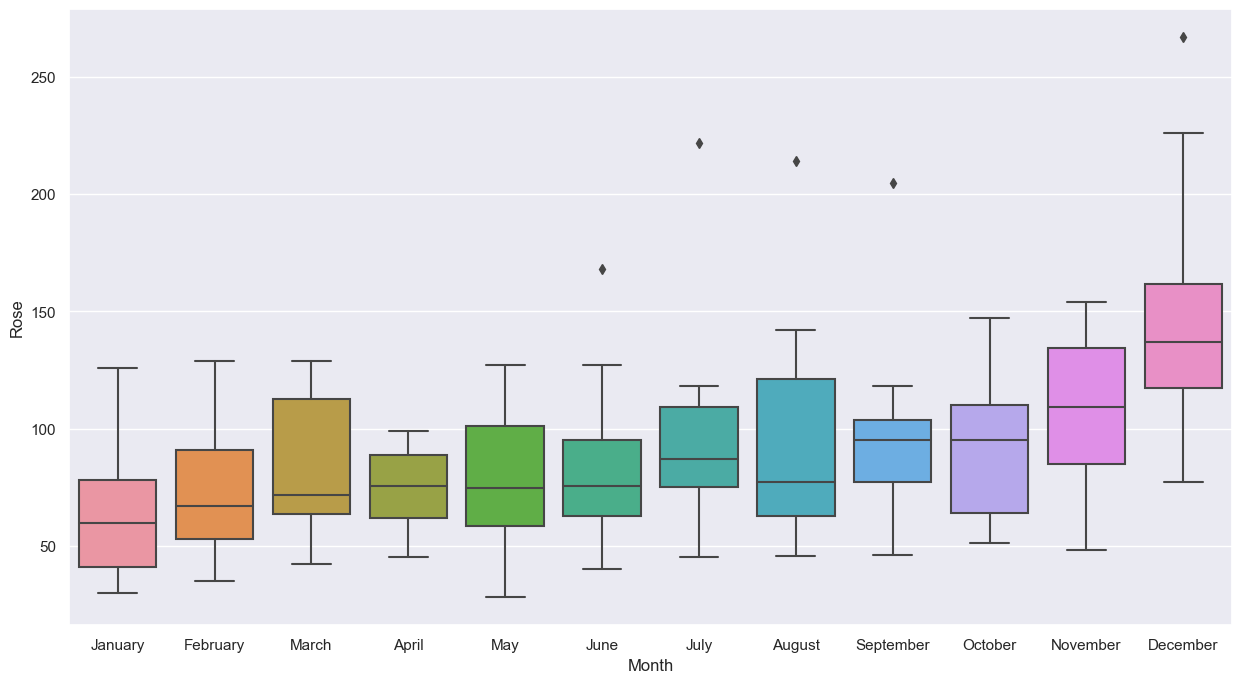

In [436]:
sns.boxplot(x = rdf.index.month_name(), y = rdf["Rose"])
plt.xlabel('Month')
plt.show()

## Monthly sales for Rose Wine across years for each month

In [437]:
from statsmodels.graphics.tsaplots import month_plot

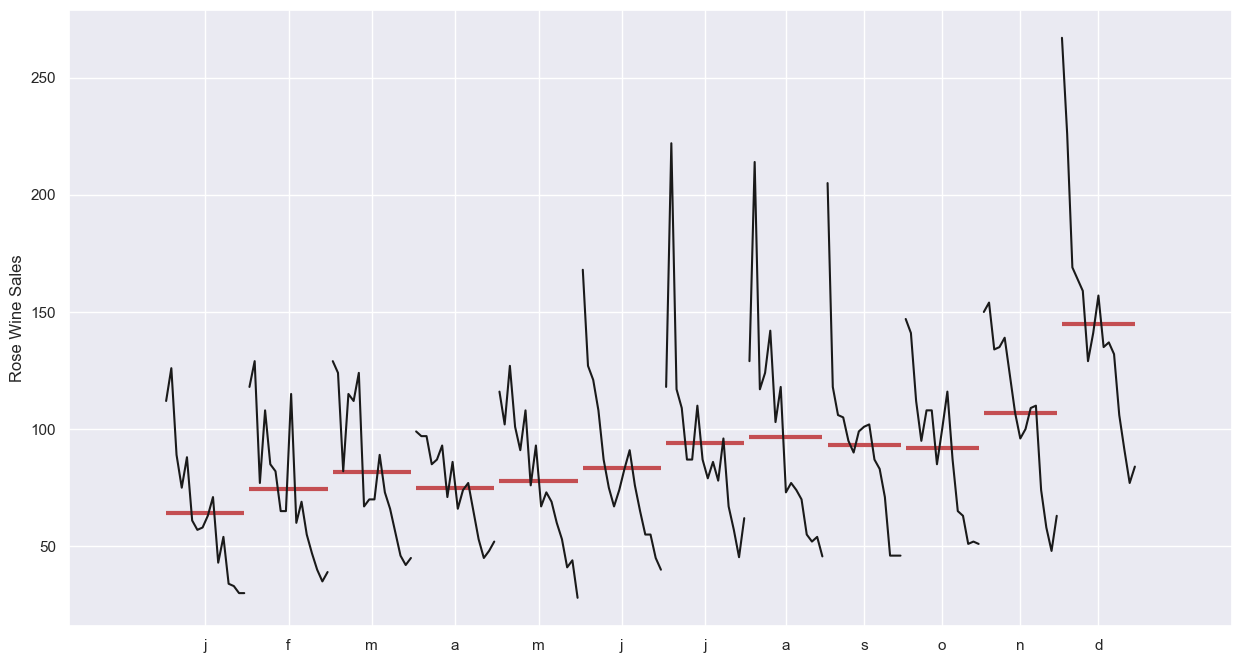

In [438]:
month_plot(rdf, ylabel="Rose Wine Sales")

# Decompose the Time Series

In [439]:
from statsmodels.tsa.seasonal import seasonal_decompose

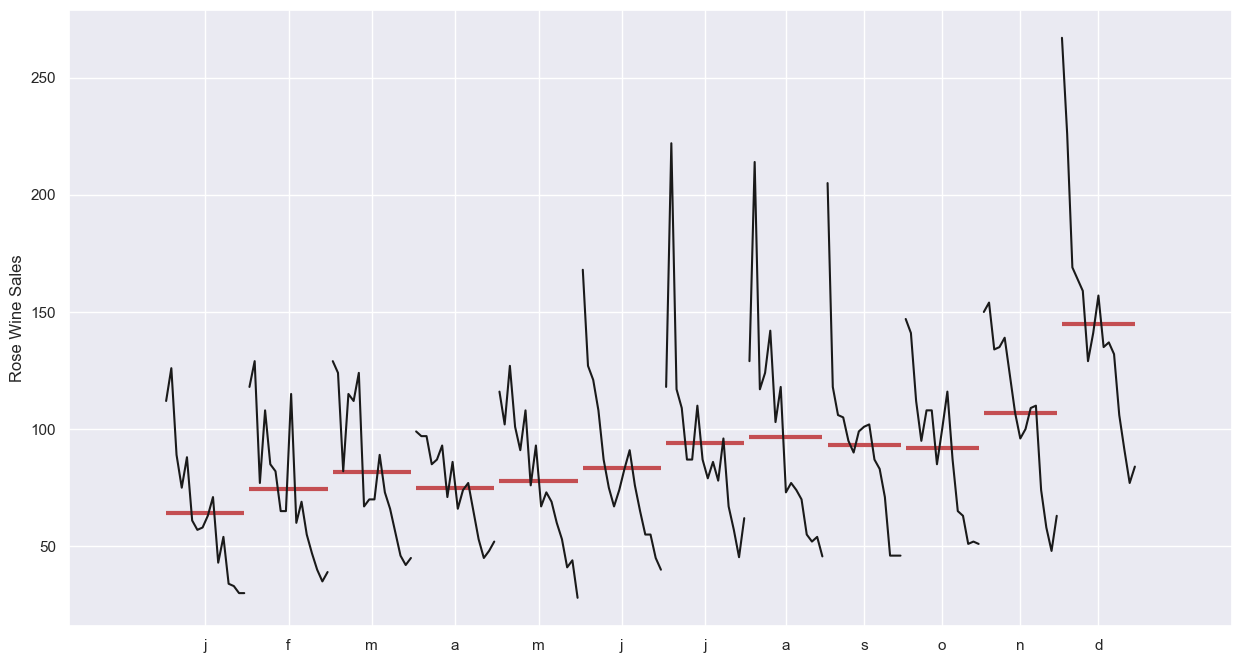

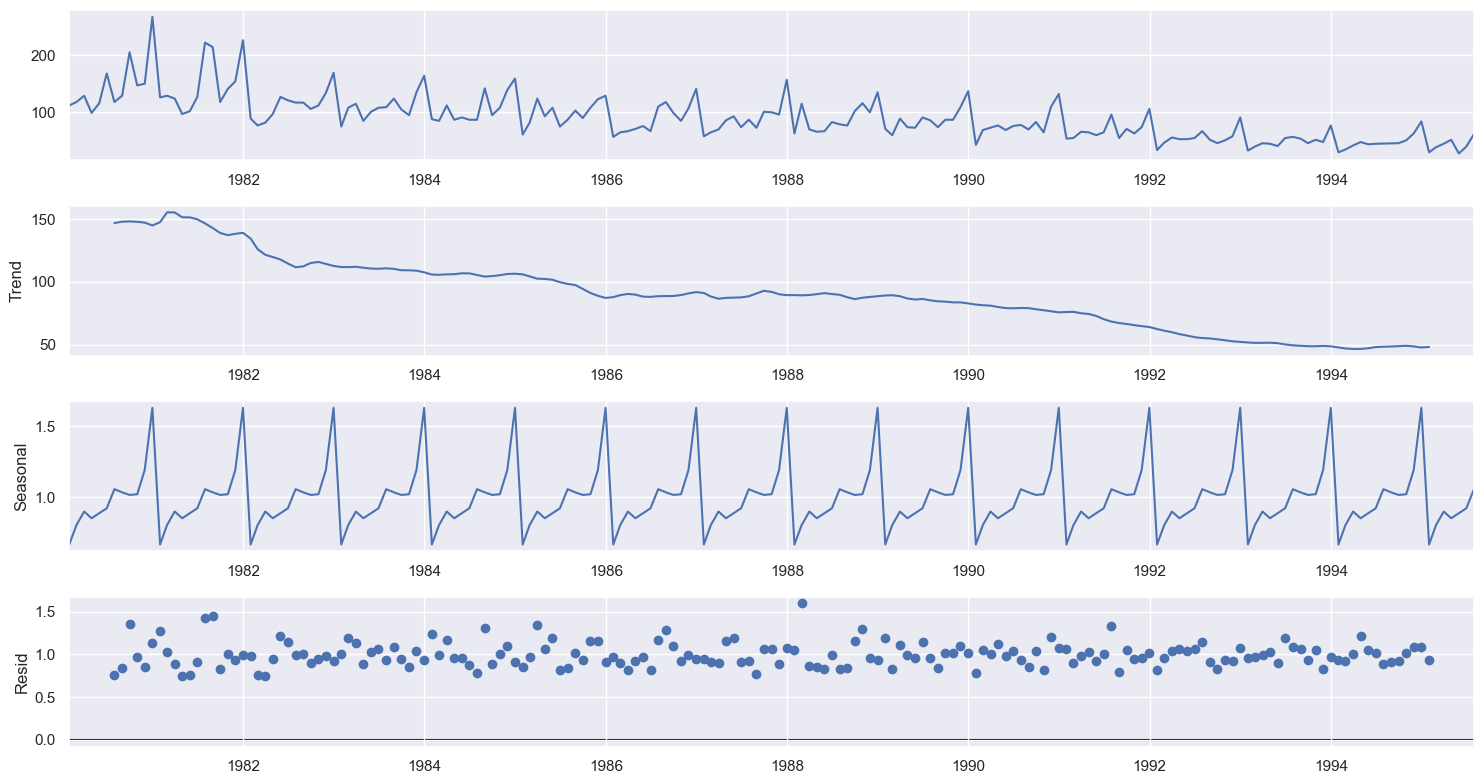

In [440]:
decomposition = seasonal_decompose(rdf, model="multiplicative")
decomposition.plot()
plt.show()

## Trend, Seasonality and Residual

In [441]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print("Trend", "\n", trend.head(12), "\n")
print("Seasonality", "\n", seasonality.head(12), "\n")
print("Residual", "\n", residual.head(12), "\n")

Trend 
 Date
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Freq: M, Name: resi

# Train test split & plot

In [442]:
train = rdf[rdf.index.year < 1991]
test = rdf[rdf.index.year >= 1991]

In [443]:
print(train)
print(test)

             Rose
Date             
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

[132 rows x 1 columns]
                  Rose
Date                  
1991-01-31   54.000000
1991-02-28   55.000000
1991-03-31   66.000000
1991-04-30   65.000000
1991-05-31   60.000000
1991-06-30   65.000000
1991-07-31   96.000000
1991-08-31   55.000000
1991-09-30   71.000000
1991-10-31   63.000000
1991-11-30   74.000000
1991-12-31  106.000000
1992-01-31   34.000000
1992-02-29   47.000000
1992-03-31   56.000000
1992-04-30   53.000000
1992-05-31   53.000000
1992-06-30   55.000000
1992-07-31   67.000000
1992-08-31   52.000000
1992-09-30   46.000000
1992-10-31   51.000000
1992-11-30   58.000000
1992-12-31   91.000000
1993-01-31   33.000000
1993-02-28   40.000000
1993-03-31   46.000000
1993-04-30   45.000000
1993-05-31   41.000000
1993-06-30   55.000000
1993-0

In [444]:
train.shape, test.shape

((132, 1), (55, 1))

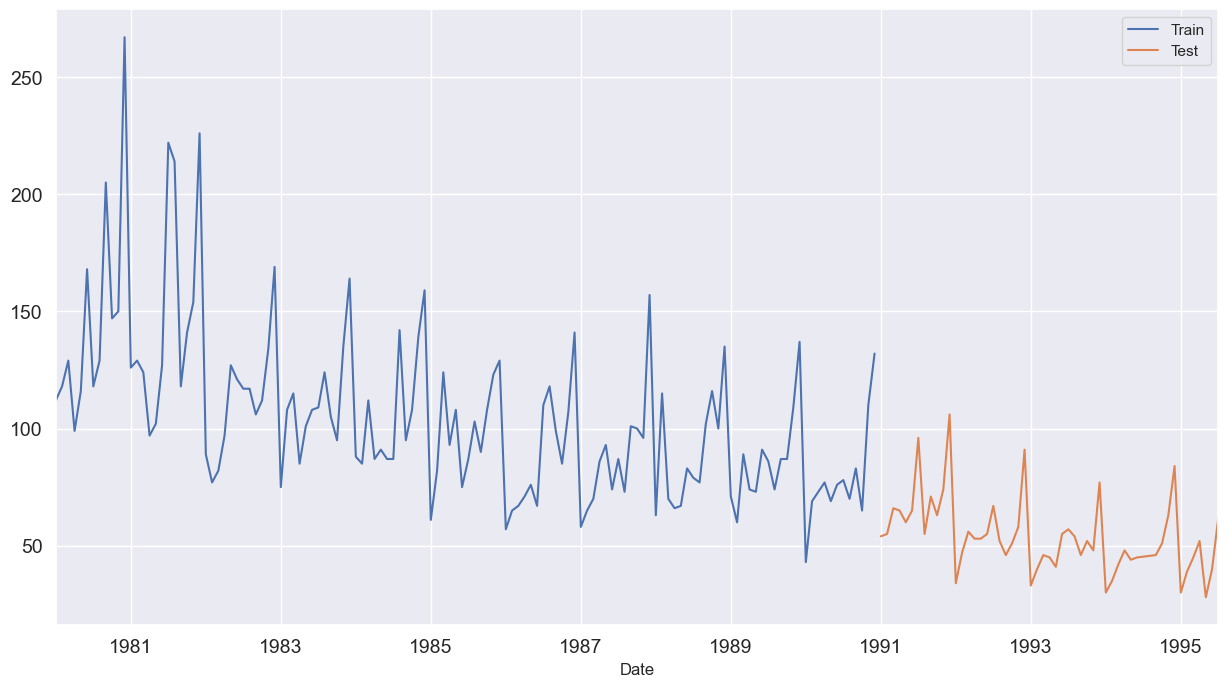

In [445]:
train["Rose"].plot(legend = True, label = "Train", fontsize = 14)
test["Rose"].plot(legend = True, label = "Test", fontsize = 14)
plt.show()

# Linear regression model – RMSE

We are going to regress the "Rose" variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [446]:
train_time  = [i + 1 for i in range(len(train))]
test_time  = [i + 133 for i in range(len(test))]

print("Train Length:", len(train), "Test Length:", len(test))

Train Length: 132 Test Length: 55


In [447]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [448]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [449]:
display(LinearRegression_train.head())
display(LinearRegression_train.tail())

,Rose,time
Date,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


,Rose,time
Date,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


In [450]:
from sklearn.linear_model import LinearRegression

In [451]:
lr = LinearRegression()

In [452]:
lr.fit(LinearRegression_train[["time"]], LinearRegression_train["Rose"])

LinearRegression()

In [453]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [454]:
LinearRegression_test.head(12)

,Rose,time,RegOnTime
Date,,,
1991-01-31,54.0,133,72.063266
1991-02-28,55.0,134,71.568888
1991-03-31,66.0,135,71.074511
1991-04-30,65.0,136,70.580133
1991-05-31,60.0,137,70.085755
1991-06-30,65.0,138,69.591377
1991-07-31,96.0,139,69.096999
1991-08-31,55.0,140,68.602621
1991-09-30,71.0,141,68.108243


## Plot

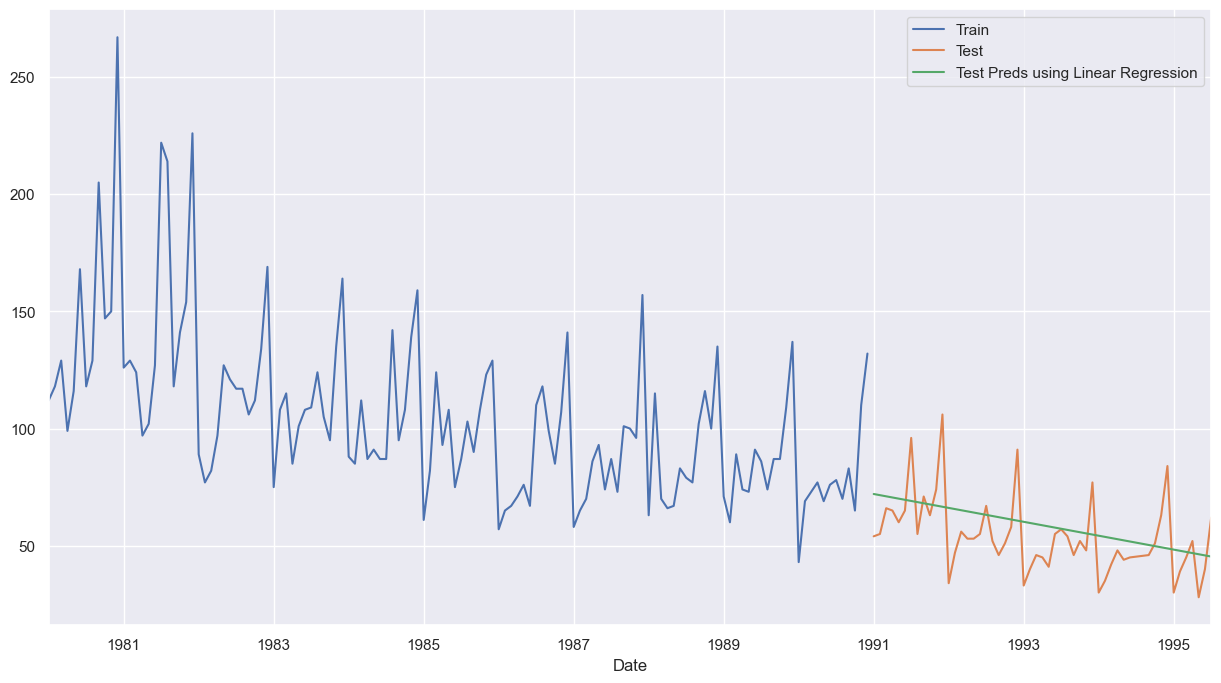

In [455]:
train["Rose"].plot(legend = True, label = 'Train')
test["Rose"].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')
plt.show()

## Accuracy Metrics and Model Evaluation

In [456]:
from statsmodels.tools.eval_measures import rmse

## Model Evaluation

In [457]:
rmse_model1_test = rmse(test["Rose"], test_predictions_model1)
rmse_model1_test

15.268955197146559

In [458]:
resultsDf = pd.DataFrame({"Test RMSE": [rmse_model1_test]}, index = ["RegressionOnTime"])
resultsDf

,Test RMSE
RegressionOnTime,15.268955


# Naïve model – RMSE

In [459]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [460]:
NaiveModel_test["naive"] = train["Rose"][len(train["Rose"])-1]

In [461]:
NaiveModel_test["naive"].head()

Date
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Freq: M, Name: naive, dtype: float64

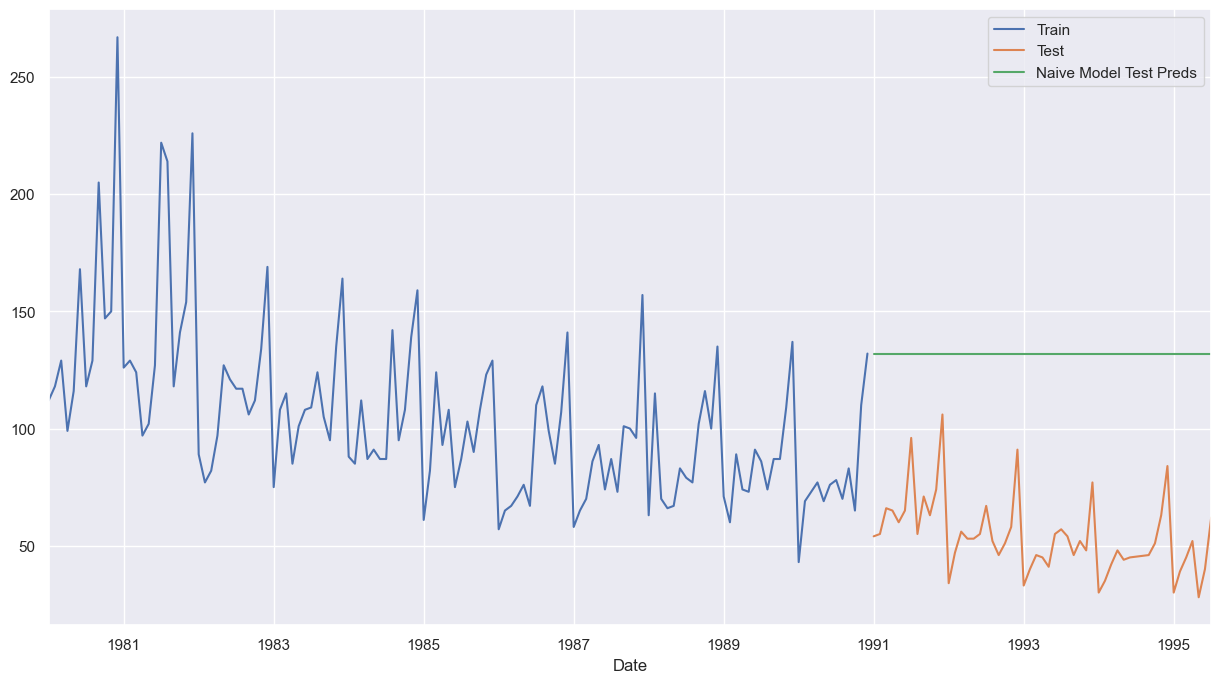

In [462]:
train["Rose"].plot(legend = True, label = "Train")
test["Rose"].plot(legend = True, label = "Test")
NaiveModel_test["naive"].plot(legend = True, label = "Naive Model Test Preds")
plt.show()

## Model Evaluation

In [463]:
rmse_model2_test = rmse(test["Rose"], NaiveModel_test["naive"])
print("RMSE for Naive Bayes",rmse_model2_test)


resultsDf_2 = pd.DataFrame({"Test RMSE": [rmse_model2_test]}, index=["NaiveModel"])
resultsDf = pd.concat([resultsDf, resultsDf_2])
display(resultsDf)

RMSE for Naive Bayes 79.71877337417347


,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773


# Simple average model – RMSE

In [464]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [465]:
SimpleAverage_test["mean_Rose"] = train["Rose"].mean()
SimpleAverage_test.head()

,Rose,mean_Rose
Date,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


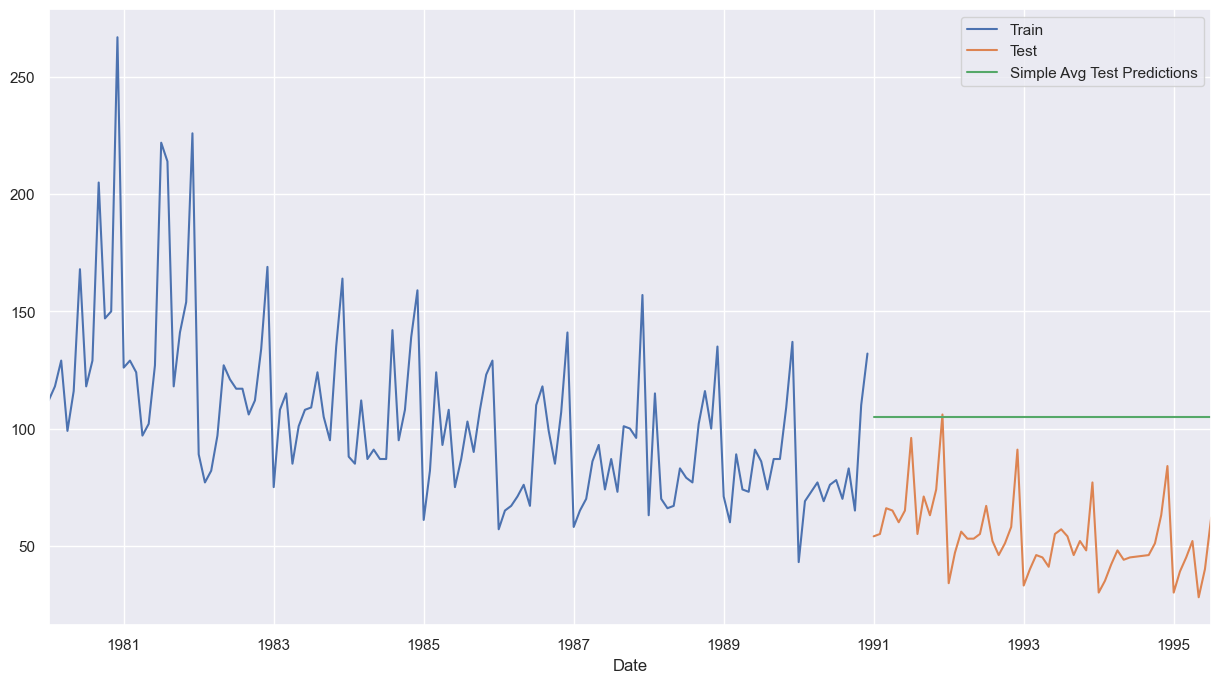

In [466]:
train["Rose"].plot(legend = True, label = "Train")
test["Rose"].plot(legend = True, label = "Test")
SimpleAverage_test["mean_Rose"].plot(legend = True, label = "Simple Avg Test Predictions")
plt.show()

## Model Evaluation

In [467]:
rmse_model3_test = rmse(test["Rose"], SimpleAverage_test["mean_Rose"])
print("RMSE for Simple Average Model is", rmse_model3_test)

RMSE for Simple Average Model is 53.460569646114436


In [468]:
reultsDf_3 = pd.DataFrame({"Test RMSE": [rmse_model3_test]}, index = ["SimpleAverageModel"])
resultsDf = pd.concat([resultsDf, reultsDf_3])
resultsDf                     


,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


# Moving average model – RMSE

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [469]:
MovingAverage = rdf.copy()
MovingAverage.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


## Trailing moving averages

In [470]:
MovingAverage["Trailing_2"] = MovingAverage["Rose"].rolling(2).mean()
MovingAverage["Trailing_4"] = MovingAverage["Rose"].rolling(4).mean()
MovingAverage["Trailing_6"] = MovingAverage["Rose"].rolling(6).mean()
MovingAverage["Trailing_9"] = MovingAverage["Rose"].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


## Plot

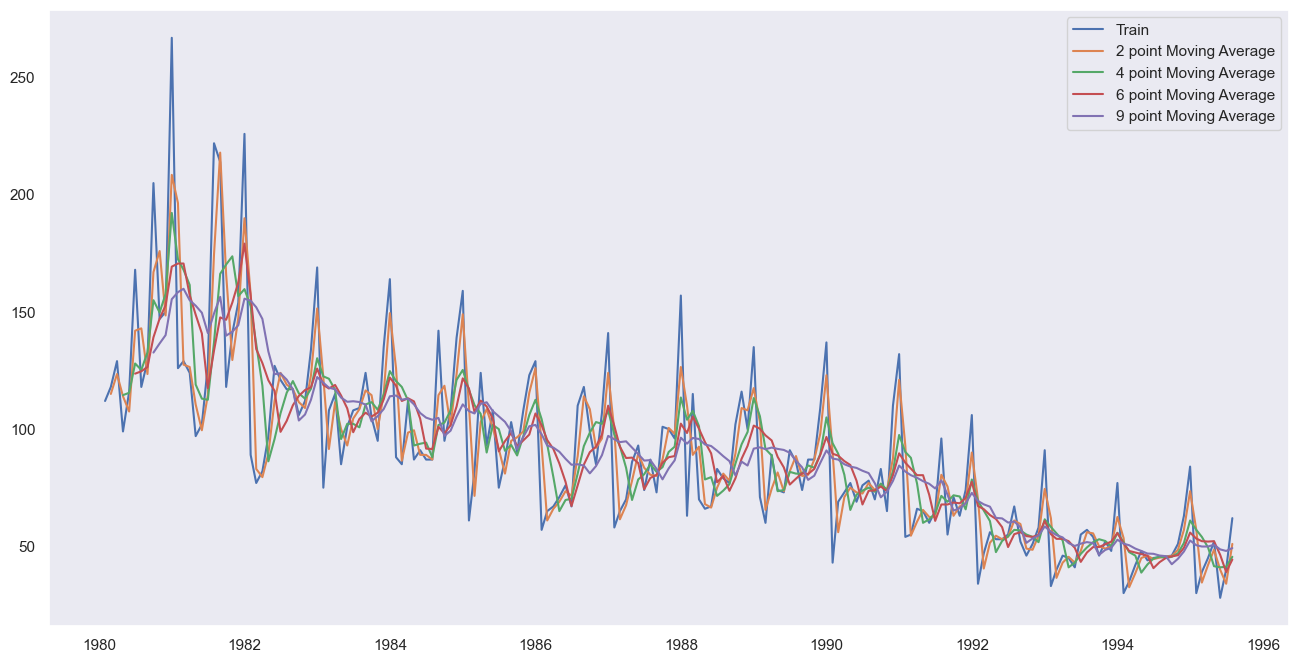

In [471]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage["Rose"], label="Train")
plt.plot(MovingAverage["Trailing_2"], label="2 point Moving Average")
plt.plot(MovingAverage["Trailing_4"], label="4 point Moving Average")
plt.plot(MovingAverage["Trailing_6"], label="6 point Moving Average")
plt.plot(MovingAverage["Trailing_9"], label="9 point Moving Average")

plt.legend(loc="best")
plt.grid()
plt.show()

## Split the data into train and test and plot

In [472]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

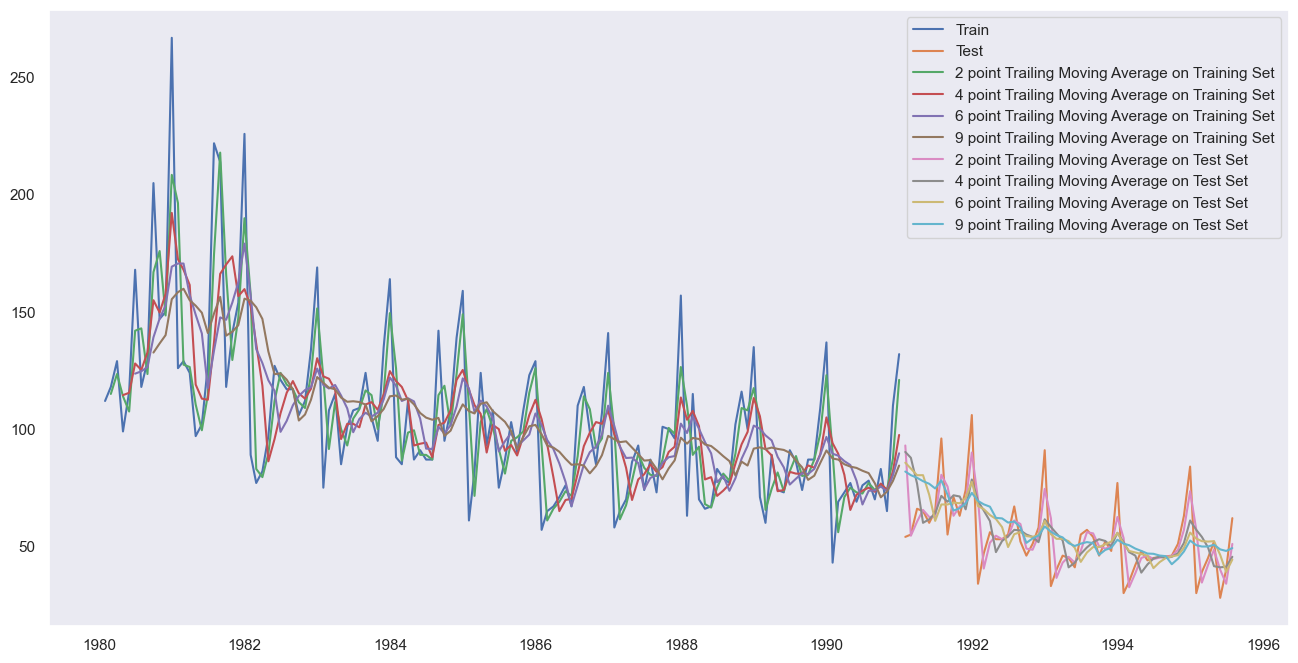

In [473]:
plt.figure(figsize=(16,8))

plt.plot(trailing_MovingAverage_train["Rose"], label="Train")
plt.plot(trailing_MovingAverage_test["Rose"], label="Test")

plt.plot(trailing_MovingAverage_train["Trailing_2"], label="2 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_4"], label="4 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_6"], label="6 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_9"], label="9 point Trailing Moving Average on Training Set")

plt.plot(trailing_MovingAverage_test["Trailing_2"], label="2 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_4"], label="4 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_6"], label="6 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_9"], label="9 point Trailing Moving Average on Test Set")

plt.legend(loc="best")
plt.grid()
plt.show()

## Model Evaluation

In [474]:
rmse_model4_test_2 = rmse(test["Rose"], trailing_MovingAverage_test["Trailing_2"])
print("Rmse for trailing_2", rmse_model4_test_2)

rmse_model4_test_4 = rmse(test["Rose"], trailing_MovingAverage_test["Trailing_4"])
print("Rmse for trailing_4", rmse_model4_test_4)

rmse_model4_test_6 = rmse(test["Rose"], trailing_MovingAverage_test["Trailing_6"])
print("Rmse for trailing_6", rmse_model4_test_6)


rmse_model4_test_9 = rmse(test["Rose"], trailing_MovingAverage_test["Trailing_9"])
print("Rmse for trailing_9", rmse_model4_test_9)

resultsDf_4 = pd.DataFrame({"Test RMSE": [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                          index = ["2_point_trailing_Moving_Average", "4_point_trailing_Moving_Average", "6_point_trailing_Moving_Average", "9_point_trailing_Moving_Average"])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Rmse for trailing_2 11.52927761935857
Rmse for trailing_4 14.451403238286431
Rmse for trailing_6 14.566327265691354
Rmse for trailing_9 14.727629822363193


,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630


# Plot of all models derived till now

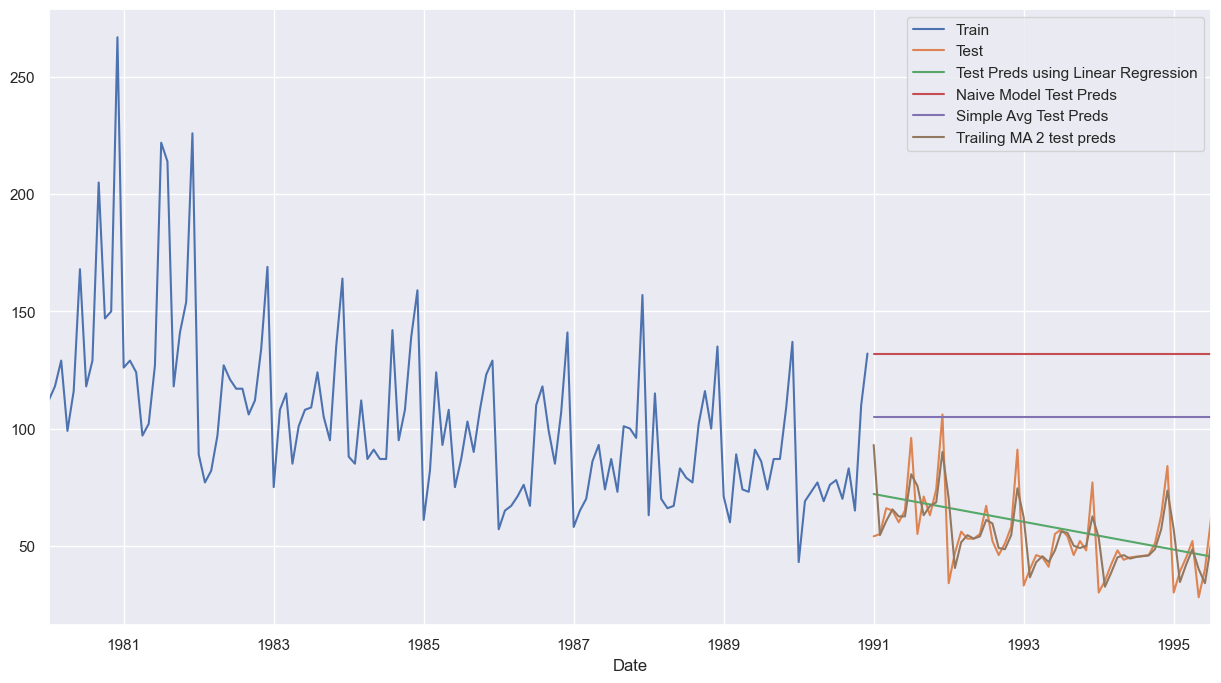

In [475]:
train["Rose"].plot(legend=True, label="Train")
test["Rose"].plot(legend=True, label="Test")

LinearRegression_test["RegOnTime"].plot(legend=True, label="Test Preds using Linear Regression")

NaiveModel_test["naive"].plot(legend=True, label="Naive Model Test Preds")

SimpleAverage_test["mean_Rose"].plot(legend=True, label="Simple Avg Test Preds")

trailing_MovingAverage_test["Trailing_2"].plot(legend=True, label="Trailing MA 2 test preds")

plt.show()

# Simple exponential smoothening – RMSE analysis

In [476]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

'SES Params'

{'smoothing_level': 0.09874989825614361,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702255613862,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

,Rose,predict
Date,,
1991-01-31 00:00:00,54.000000,87.104999
1991-02-28 00:00:00,55.000000,87.104999
1991-03-31 00:00:00,66.000000,87.104999
1991-04-30 00:00:00,65.000000,87.104999
1991-05-31 00:00:00,60.000000,87.104999


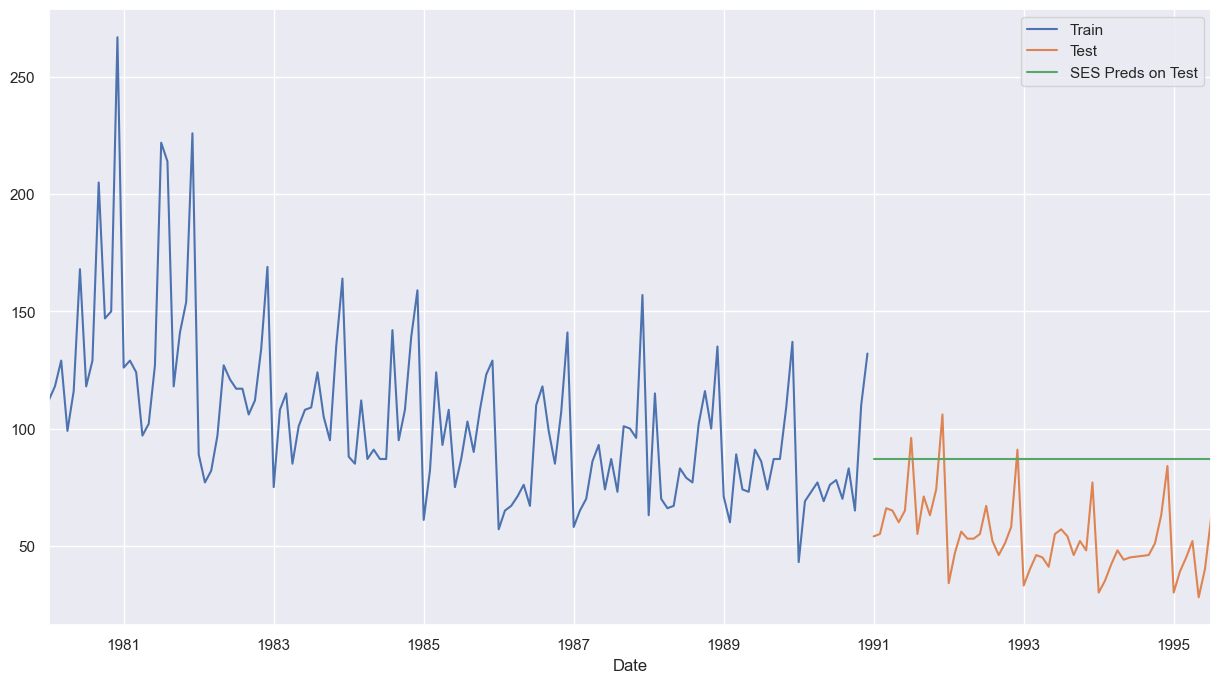

In [477]:
SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train["Rose"]);

model_SES_autofit = model_SES.fit()

display("SES Params", model_SES_autofit.params)

SES_test["predict"] = model_SES_autofit.forecast(steps=len(test))

display(SES_test.head().style)

SES_train["Rose"].plot(legend=True, label="Train")
SES_test["Rose"].plot(legend=True, label="Test")
SES_test["predict"].plot(legend=True, label="SES Preds on Test")
plt.show()


## Model Evaluation

In [478]:
rmse_model5_test_1 = rmse(SES_test["Rose"], SES_test["predict"])
display(rmse_model5_test_1)

resultsDf_5 = pd.DataFrame({"Test RMSE": [+rmse_model5_test_1]}, index=["Alpha=0.102,SimpleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_5])
display(resultsDf)


36.79624208189247

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
"Alpha=0.102,SimpleExponentialSmoothing",36.796242


## Set different alpha values

In [479]:
resultsDf_6 = pd.DataFrame({"Alpha Values":[], "Train RMSE": [], "Test RMSE": []})


alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    
    SES_train["predict",i] = model_SES_alpha_i.fittedvalues
    SES_test["predict",i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = rmse(SES_train["Rose"],SES_train["predict",i])
        
    rmse_model5_test_i = rmse(SES_test["Rose"],SES_test["predict",i])
    
    resultsDf_6 = resultsDf_6.append({"Alpha Values":i,
                                      "Train RMSE": rmse_model5_train_i,"Test RMSE":rmse_model5_test_i}, 
                                     ignore_index=True)
    
display(SES_test.head().style)

display("Model Evaluation", resultsDf_6.sort_values(by=["Test RMSE"],ascending=True))



,Rose,predict,"('predict', 0.3)","('predict', 0.4)","('predict', 0.5)","('predict', 0.6)","('predict', 0.7)","('predict', 0.8)","('predict', 0.9)"
Date,,,,,,,,,
1991-01-31 00:00:00,54.000000,87.104999,98.669021,105.260413,111.376470,116.885470,121.747572,125.925560,129.366777
1991-02-28 00:00:00,55.000000,87.104999,98.669021,105.260413,111.376470,116.885470,121.747572,125.925560,129.366777
1991-03-31 00:00:00,66.000000,87.104999,98.669021,105.260413,111.376470,116.885470,121.747572,125.925560,129.366777
1991-04-30 00:00:00,65.000000,87.104999,98.669021,105.260413,111.376470,116.885470,121.747572,125.925560,129.366777
1991-05-31 00:00:00,60.000000,87.104999,98.669021,105.260413,111.376470,116.885470,121.747572,125.925560,129.366777


'Model Evaluation'

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.448833,47.504821
1,0.4,33.028400,53.767406
2,0.5,33.680192,59.641786
3,0.6,34.439946,64.971288
4,0.7,35.322683,69.698162
5,0.8,36.334371,73.773992
6,0.9,37.482735,77.139276


## Plot

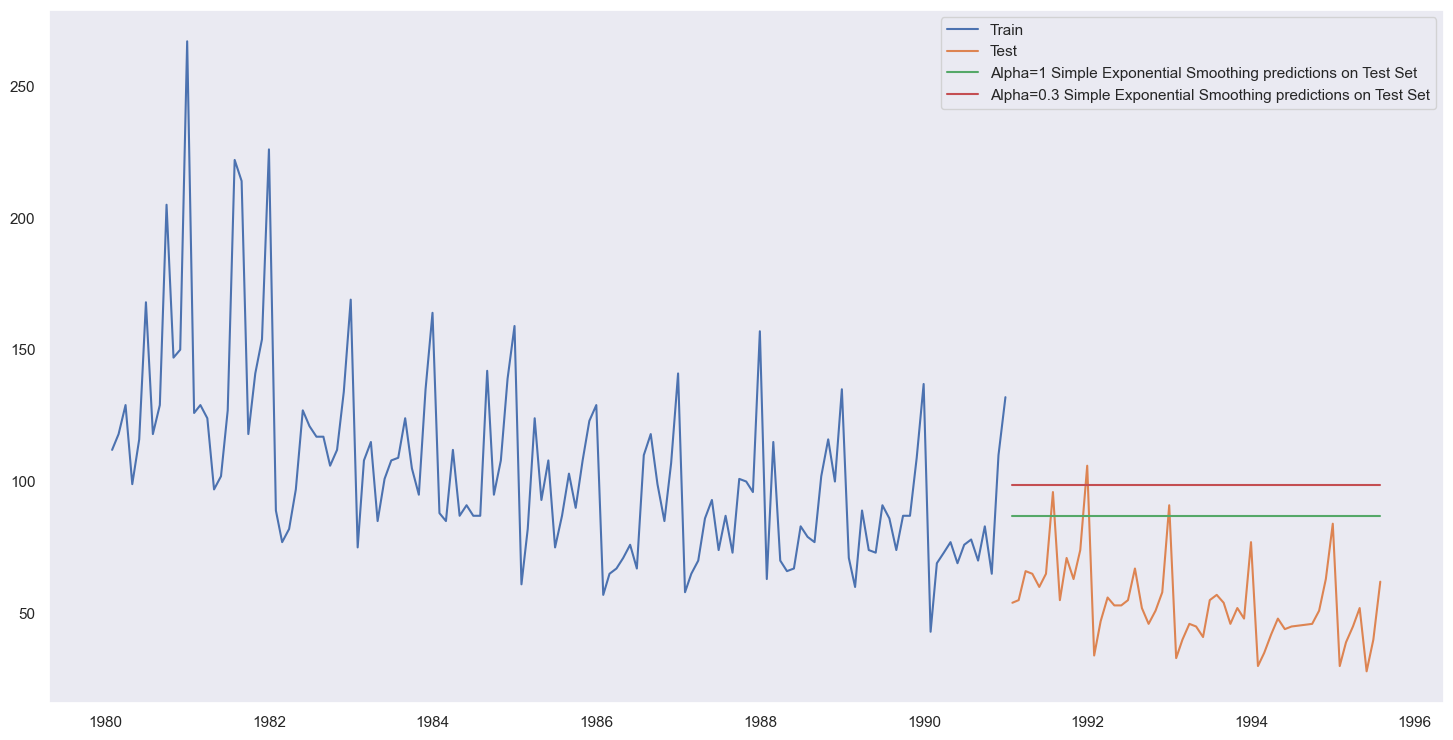

In [480]:
plt.figure(figsize=(18,9))
plt.plot(SES_train["Rose"], label="Train")
plt.plot(SES_test["Rose"], label="Test")
plt.plot(SES_test["predict"], label="Alpha=1 Simple Exponential Smoothing predictions on Test Set")
plt.plot(SES_test["predict", 0.3], label="Alpha=0.3 Simple Exponential Smoothing predictions on Test Set")
plt.legend(loc="best")
plt.grid()
plt.show()

In [481]:
resultsDf_6_1 = pd.DataFrame({"Test RMSE": [resultsDf_6.sort_values(by=["Test RMSE"], ascending=True).values[0][2]]},
                          index = ["Alpha=0.9,SimpleExponentialSmoothing"])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])

display(resultsDf.style)

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
"Alpha=0.102,SimpleExponentialSmoothing",36.796242
"Alpha=0.9,SimpleExponentialSmoothing",47.504821


# Double exponential smoothening (Holt’s method) – RMSE analysis

In [482]:
DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train["Rose"])

resultsDf_7 = pd.DataFrame({"Alpha Values": [], "Beta Values": [], "Train RMSE": [], "Test RMSE": []})

alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in alpha_list:
    for j in beta_list:
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j)
        
        DES_train["predict",i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test["predict",i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = rmse(DES_train["Rose"],DES_train["predict",i,j])
        
        rmse_model6_test = rmse(DES_test["Rose"],DES_test["predict",i,j])
        
        resultsDf_7 = resultsDf_7.append({"Alpha Values":i,
                                          "Beta Values":j,
                                          "Train RMSE": rmse_model6_train,
                                          "Test RMSE": rmse_model6_test}, ignore_index=True)
        
display(resultsDf_7.sort_values(by=["Test RMSE"]).head(10))        


,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.928003,265.567594
8,0.4,0.3,36.733732,339.306534
1,0.3,0.4,37.356026,358.750942
16,0.5,0.3,37.424080,394.272629
24,0.6,0.3,38.343309,439.296033
9,0.4,0.4,37.982228,441.965558
2,0.3,0.5,38.828384,451.810230
32,0.7,0.3,39.554250,477.060557
17,0.5,0.4,38.557286,500.437734
40,0.8,0.3,41.034375,506.353933


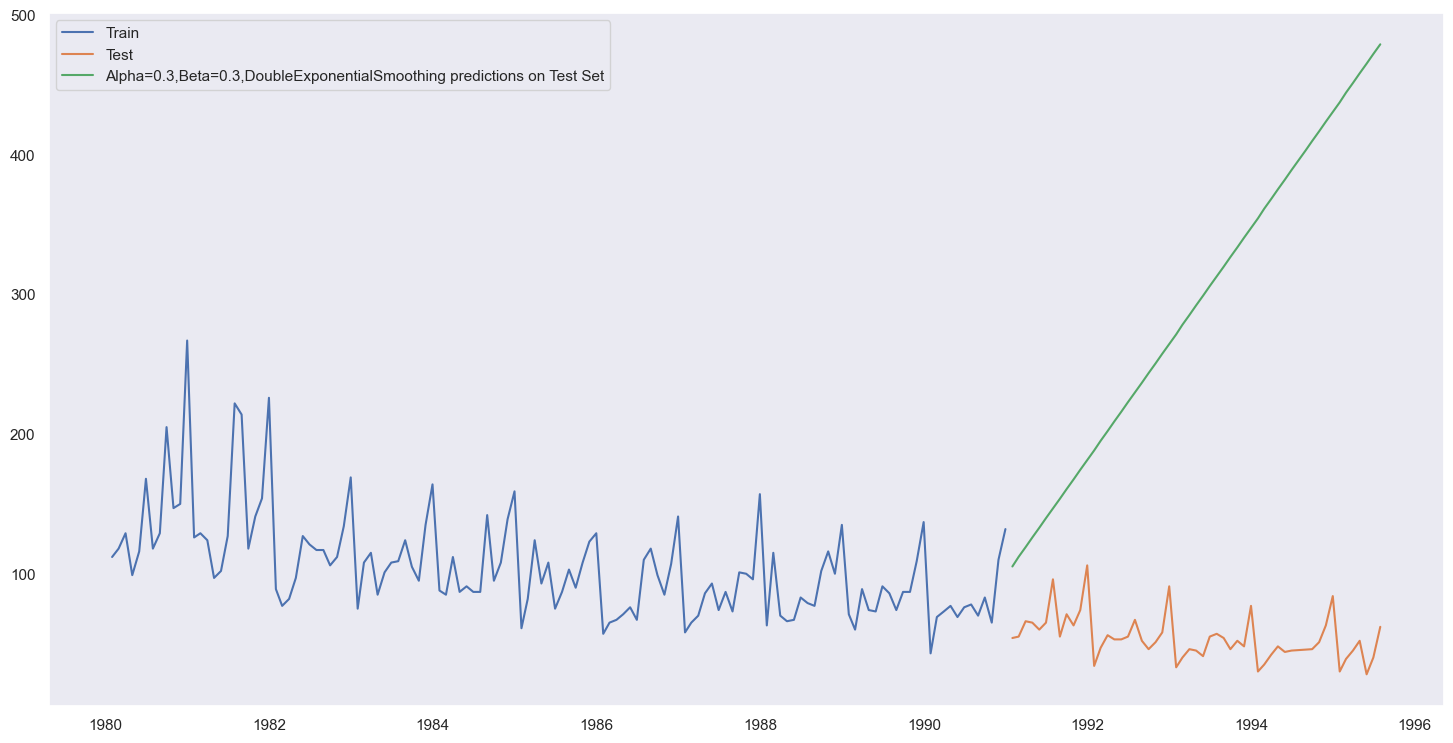

In [483]:
plt.figure(figsize=(18,9))
plt.plot(DES_train["Rose"], label="Train")
plt.plot(DES_test["Rose"], label="Test")

plt.plot(DES_test["predict", 0.3, 0.3],  label="Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set")
plt.legend(loc="best")
plt.grid()
plt.show()

In [484]:
resultsDf_7_1 = pd.DataFrame({"Test RMSE": [resultsDf_7.sort_values(by=["Test RMSE"]).values[0][3]]}, 
                             index=["Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
display(resultsDf)

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
"Alpha=0.102,SimpleExponentialSmoothing",36.796242
"Alpha=0.9,SimpleExponentialSmoothing",47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


# Triple exponential smoothening (Holt’s winter model) – RMSE analysis

{'smoothing_level': 0.06467234615091698,
 'smoothing_trend': 0.05315920636255018,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 50.880912909225756,
 'initial_trend': -0.31656840824205823,
 'initial_seasons': array([2.21583703, 2.51439498, 2.74693025, 2.40118428, 2.69936273,
        2.94338111, 3.2353888 , 3.44052906, 3.26420741, 3.19365239,
        3.72269442, 5.13435788]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

,Rose,auto_predict
Date,,
1991-01-31,54.0,57.0
1991-02-28,55.0,64.0
1991-03-31,66.0,70.0
1991-04-30,65.0,61.0
1991-05-31,60.0,68.0


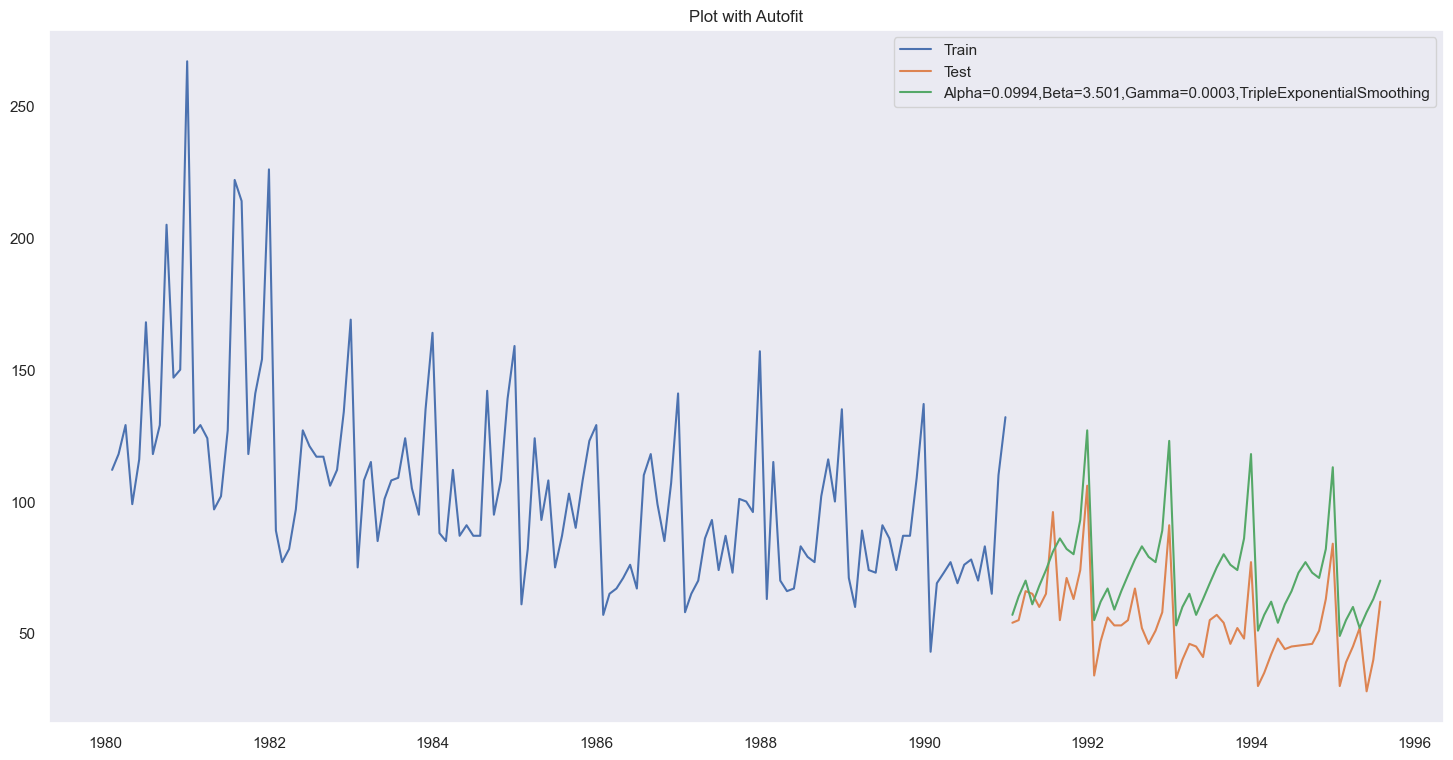

In [485]:
TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(TES_train["Rose"], trend="additive", seasonal="multiplicative", freq="M")

model_TES_autofit = model_TES.fit()

display(model_TES_autofit.params)


TES_test["auto_predict"] = model_TES_autofit.forecast(steps=len(test)).round(0)
display(TES_test.head())

plt.figure(figsize=(18,9))
plt.plot(TES_train["Rose"], label="Train")
plt.plot(TES_test["Rose"], label="Test")
plt.plot(TES_test["auto_predict"], label="Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExponentialSmoothing")
plt.legend(loc="best")
plt.title("Plot with Autofit")
plt.grid()

plt.show()



## RMSE

In [486]:
rmse_model6_test_1 = rmse(TES_test["Rose"], TES_test["auto_predict"])
display(rmse_model6_test_1)

resultsDf_8_1 = pd.DataFrame({"Test RMSE": [rmse_model6_test_1]}, index=["Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
display(resultsDf)

21.224437982589023

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
"Alpha=0.102,SimpleExponentialSmoothing",36.796242
"Alpha=0.9,SimpleExponentialSmoothing",47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


## Identify best alpha, beta and gamma

In [487]:
import warnings
warnings.filterwarnings('ignore')

resultsDf_8_2 = pd.DataFrame({"Alpha Values":[],"Beta Values":[],"Gamma Values":[],"Train RMSE":[],"Test RMSE": []})


gamma_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train["predict",i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test["predict",i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = rmse(TES_train["Rose"],
                                     TES_train["predict",i,j,k])
            
            rmse_model8_test = rmse(TES_test["Rose"],
                                    TES_test["predict",i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({"Alpha Values":i,
                                                  "Beta Values":j,
                                                  "Gamma Values":k,
                                                  "Train RMSE":rmse_model8_train,
                                                  "Test RMSE":rmse_model8_test},ignore_index=True)
            
display(TES_test.head().style)
display(resultsDf_8_2.sort_values(by=["Test RMSE"]).head())


resultsDf_8_3 = pd.DataFrame({"Test RMSE": [resultsDf_8_2.sort_values(by=["Test RMSE"]).values[0][4]]}
                           ,index=["Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialSmoothing"])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
display(resultsDf.sort_values(by=["Test RMSE"]))



,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
1,0.3,0.3,0.4,24.209084,10.169599
17,0.3,0.5,0.4,25.873405,10.375164
26,0.3,0.6,0.5,28.141788,10.777034
84,0.4,0.5,0.7,31.193940,13.368421
76,0.4,0.4,0.7,29.933604,17.231419


,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialSmoothing",10.169599
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
RegressionOnTime,15.268955
"Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExponentialSmoothing",21.224438
"Alpha=0.102,SimpleExponentialSmoothing",36.796242
"Alpha=0.9,SimpleExponentialSmoothing",47.504821
SimpleAverageModel,53.460570


## Plot SES, DES and TES

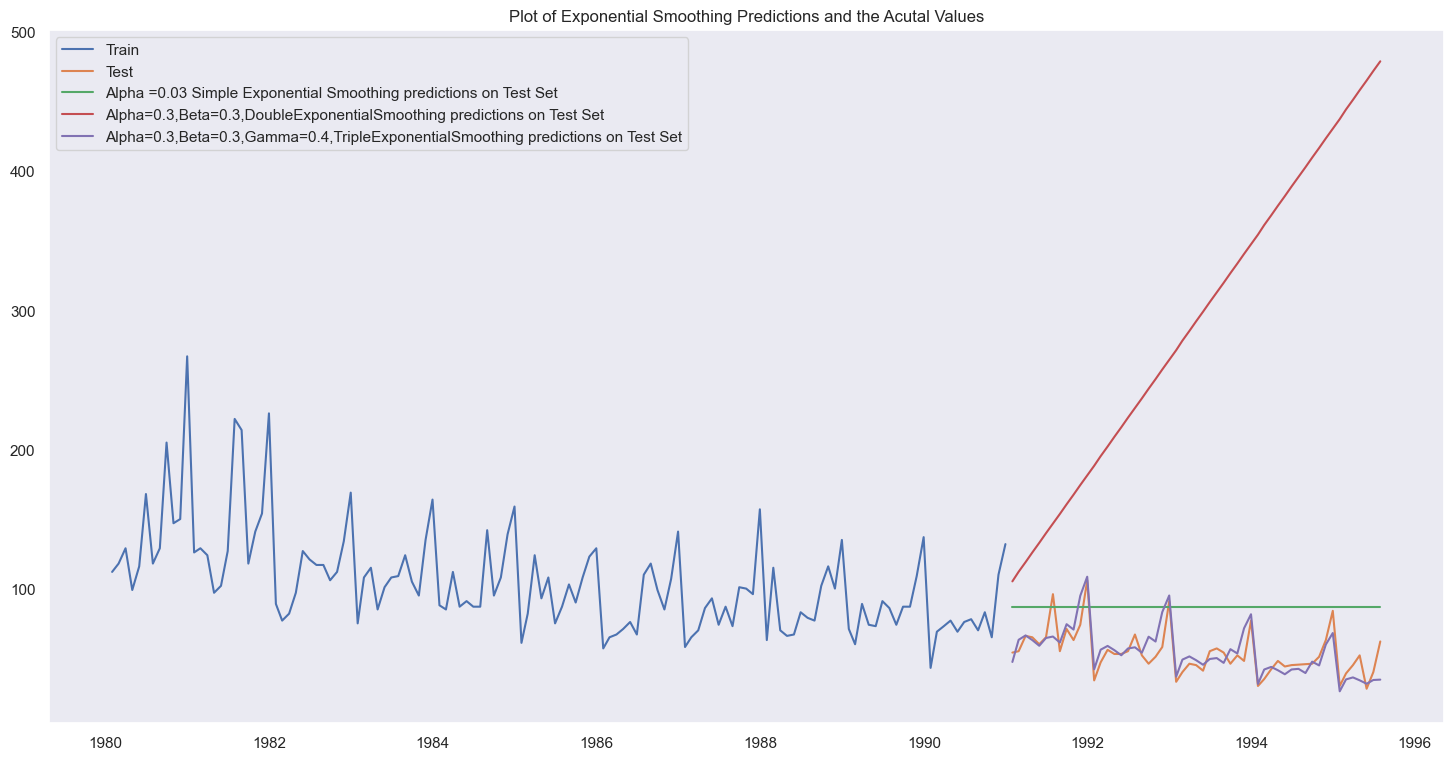

In [488]:
# 'smoothing_level': 0.09942398570261507,
#  'smoothing_trend': 3.5015167744954147e-06,
#  'smoothing_seasonal': 0.0003177759456525393,

plt.figure(figsize=(18,9))
plt.plot(train["Rose"], label="Train")
plt.plot(test["Rose"], label="Test")

plt.plot(SES_test["predict"], label="Alpha =0.03 Simple Exponential Smoothing predictions on Test Set")

plt.plot(DES_test["predict", 0.3, 0.3], label="Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set")

plt.plot(TES_test["predict", 0.3, 0.3, 0.4], label="Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set")

plt.legend(loc="best")
plt.grid();
plt.title("Plot of Exponential Smoothing Predictions and the Acutal Values");
plt.show()

## Training TES model with full data

'Full model RMSE'

21.01321947940308

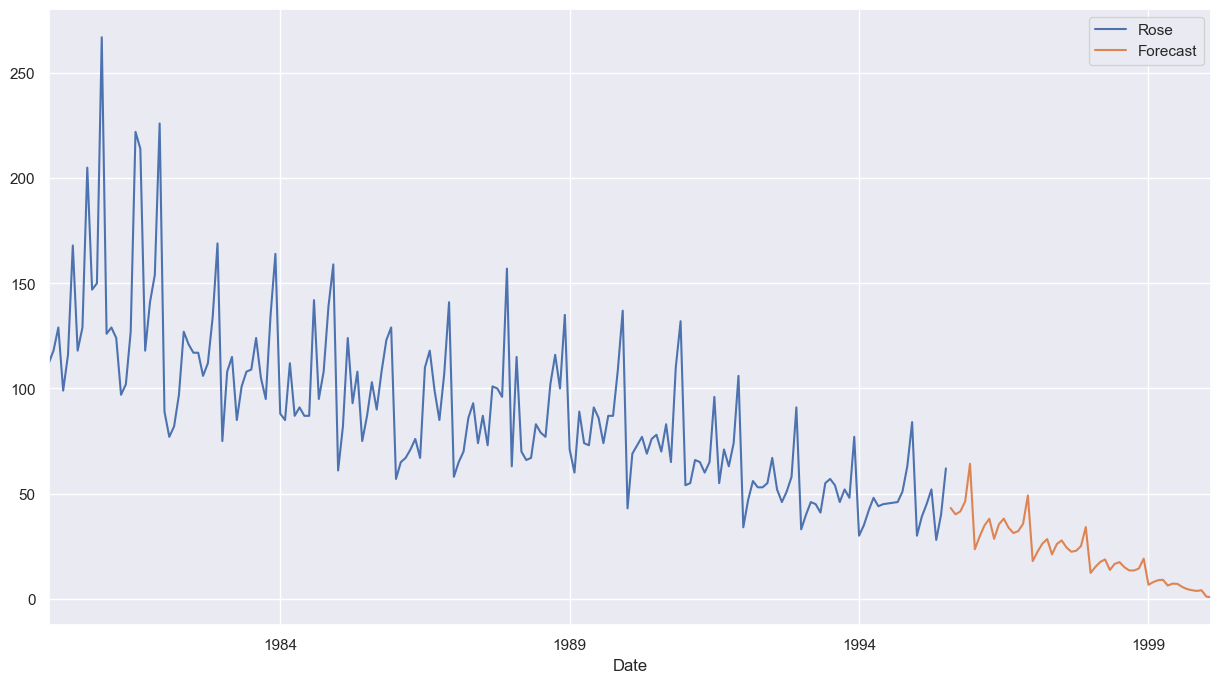

In [489]:
fullmodel1 = ExponentialSmoothing(rdf,trend="additive",seasonal="multiplicative")
fullmodel1= fullmodel1.fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.4)

RMSE_fullmodel1 = rmse(rdf["Rose"], fullmodel1.fittedvalues)
display("Full model RMSE", RMSE_fullmodel1)

prediction_1 = fullmodel1.forecast(steps=len(test))

rdf.plot(legend=True, label="Actual")
prediction_1.plot(legend=True, label="Forecast")

plt.show()


## Margin of Error

,lower_CI,prediction,upper_ci
1995-08-31 00:00:00,1.908255,43.170624,84.432992
1995-09-30 00:00:00,-1.119912,40.142457,81.404826
1995-10-31 00:00:00,0.300036,41.562405,82.824774
1995-11-30 00:00:00,5.032775,46.295144,87.557513
1995-12-31 00:00:00,22.929432,64.191801,105.454170


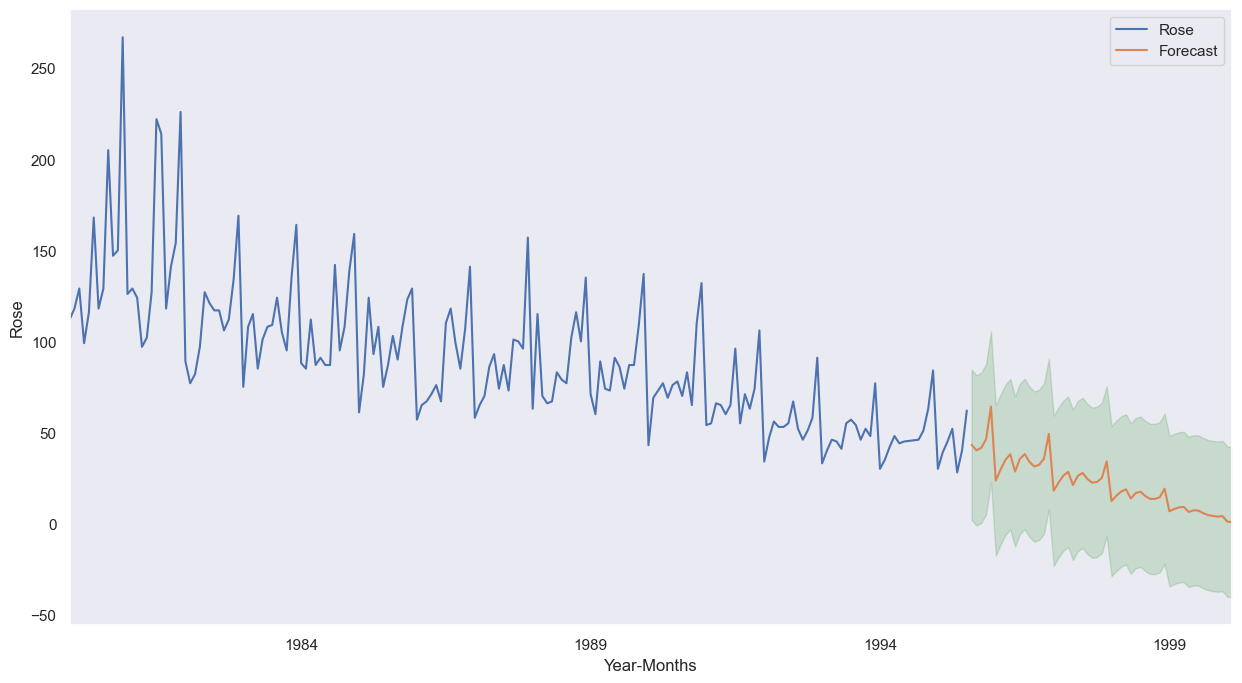

In [490]:
pred_1_df = pd.DataFrame({"lower_CI":prediction_1 - 1.96*fullmodel1.resid.std(),
                          "prediction":prediction_1,
                          "upper_ci": prediction_1 + 1.96*fullmodel1.resid.std()})
display(pred_1_df.head().style)


axis = rdf.plot(label="Actual", figsize=(15,8))
pred_1_df["prediction"].plot(ax=axis, label="Forecast", alpha=1) # alpha here is for transparency of the prediction line

axis.fill_between(pred_1_df.index, pred_1_df["lower_CI"], pred_1_df["upper_ci"], color="green", alpha=.15) # alpha here denotes the transparency of the shaded region

axis.set_xlabel("Year-Months")
axis.set_ylabel("Rose")
plt.legend(loc="best")
plt.grid()
plt.show();

# Stationarity check with AdFuller

In [491]:
from statsmodels.tsa.stattools import adfuller

display("Results of Dickey-Fuller Test:")
dftest = adfuller(rdf["Rose"])

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])

for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value

display(dfoutput)
display("P Value: ", dftest[1], "H0 rejected and the time series is stationary")

'Results of Dickey-Fuller Test:'

Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64

'P Value: '

0.34310071428337663

'H0 rejected and the time series is stationary'

# Build ARIMA model with lowest AIC score – test this model on test data using RMSE

In [492]:
import itertools # library for generating all possible combinations of given number sets
from statsmodels.tsa.arima_model import ARIMA

p = q = range(0, 4)
d= range(1,2) # required as itertools product function expects the parameters as range objects, even if it is only value

pdq = list(itertools.product(p, d, q))
 
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=["Param", "AIC"])
ARIMA_AIC

for param in pdq:
    ARIMA_model = ARIMA(train["Rose"], order=param).fit()
    
    display(f"ARIMA{param} - AIC:{ARIMA_model.aic}")
    
    ARIMA_AIC=ARIMA_AIC.append({"Param":param, "AIC": ARIMA_model.aic}, ignore_index=True)
    
display(ARIMA_AIC.sort_values(by=["AIC"],ascending=True))    

'ARIMA(0, 1, 0) - AIC:1335.1526583086775'

'ARIMA(0, 1, 1) - AIC:1280.7261830464295'

'ARIMA(0, 1, 2) - AIC:1276.8353724265137'

'ARIMA(0, 1, 3) - AIC:1278.074261468577'

'ARIMA(1, 1, 0) - AIC:1319.3483105801872'

'ARIMA(1, 1, 1) - AIC:1277.7757508081509'

'ARIMA(1, 1, 2) - AIC:1277.3592218920899'

'ARIMA(1, 1, 3) - AIC:1279.3126413359505'

'ARIMA(2, 1, 0) - AIC:1300.6092611743966'

'ARIMA(2, 1, 1) - AIC:1279.0456894093159'

'ARIMA(2, 1, 2) - AIC:1279.2986939364937'

'ARIMA(2, 1, 3) - AIC:1281.1962260422388'

'ARIMA(3, 1, 0) - AIC:1299.4787391543114'

'ARIMA(3, 1, 1) - AIC:1279.6059711231028'

'ARIMA(3, 1, 2) - AIC:1280.9692522114606'

'ARIMA(3, 1, 3) - AIC:1273.1940939395067'

,Param,AIC
15,"(3, 1, 3)",1273.194094
2,"(0, 1, 2)",1276.835372
6,"(1, 1, 2)",1277.359222
5,"(1, 1, 1)",1277.775751
3,"(0, 1, 3)",1278.074261
9,"(2, 1, 1)",1279.045689
10,"(2, 1, 2)",1279.298694
7,"(1, 1, 3)",1279.312641
13,"(3, 1, 1)",1279.605971
1,"(0, 1, 1)",1280.726183


In [493]:
auto_ARIMA = ARIMA(train["Rose"], order=(3,1,3),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

display(results_auto_ARIMA.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 15 Aug 2021   AIC                           1273.194
Time:                        19:16:01   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.405      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7218      0.087     -8.336      0.000      -0.891      -0.552
ar.L3.D.Rose     0.2764      0.086      3.232      0.001       0.109       0.444
ma.L1.D.Rose    -0.0151      0.045     -0.339      0.734      -0.102       0.072
ma.L2.D.Rose     0.0151      0.044      0.341      0.733      -0.072       0.102
ma.L3.D.Rose    -1.0000      0.046    -21.894      0.000      -1.090      -0.910
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5011           -0.8661j            1.0006           -0.3335
AR.2           -0.5011           +0.8661j            1.0006            0.3335
AR.3            3.6138           -0.0000j            3.6138           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.4924           -0.8703j            1.0000           -0.3319
MA.3           -0.4924           +0.8703j            1.0000            0.3319
-----------------------------------------------------------------------------
"""

## Prediction

In [494]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

RMSE_autoarima = rmse(test["Rose"],predicted_auto_ARIMA[0])
display(RMSE_autoarima)

resultsDf_arima = pd.DataFrame({'Test RMSE': [RMSE_autoarima]}
                           ,index=['ARIMA(3,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_arima])

display(resultsDf)

15.987025695134827

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
"Alpha=0.102,SimpleExponentialSmoothing",36.796242
"Alpha=0.9,SimpleExponentialSmoothing",47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


## Manual Arima using ACF and PACF plots

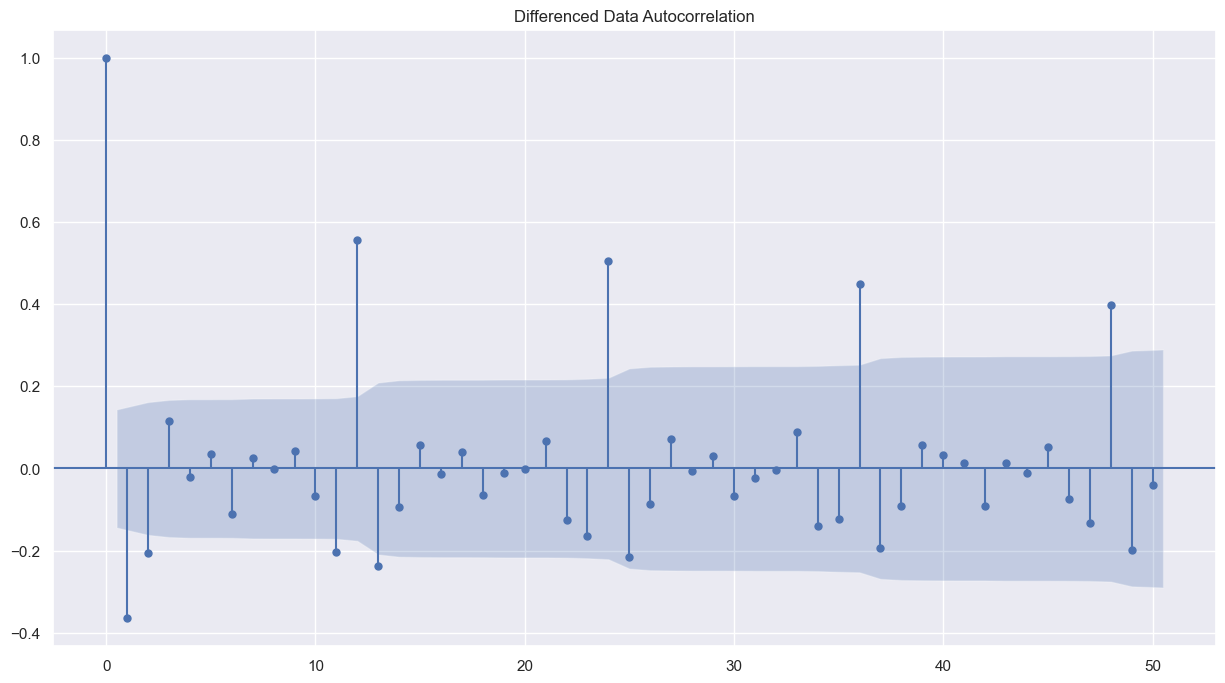

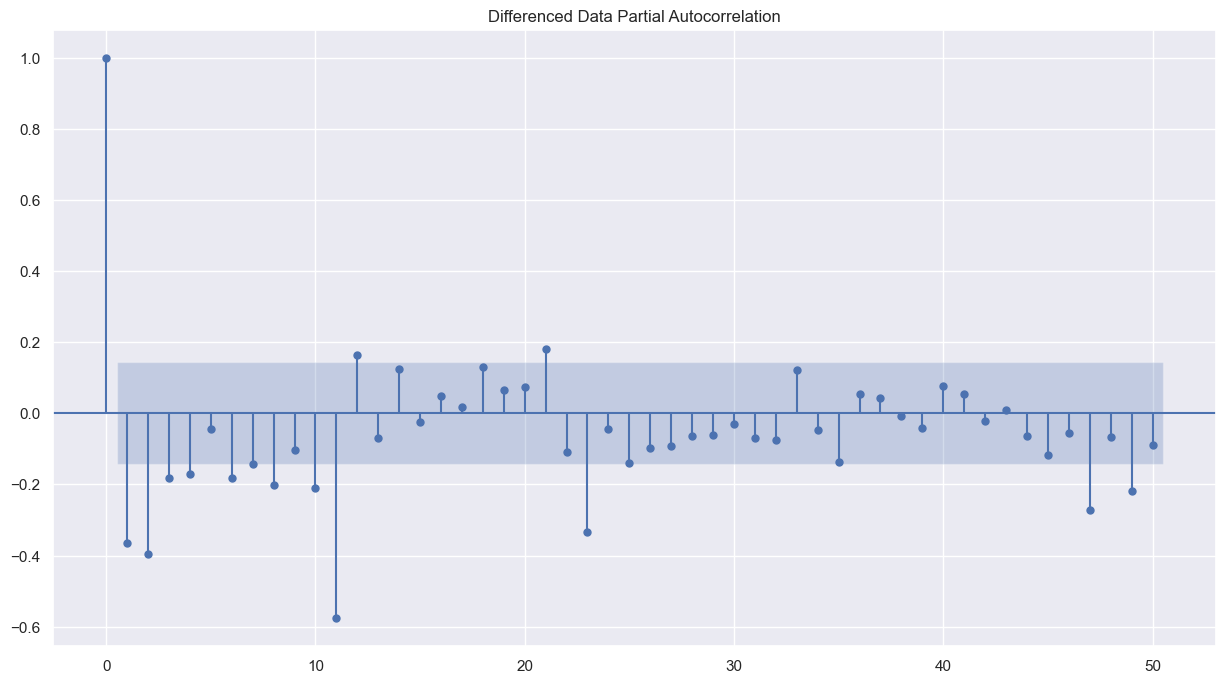

'p value from PACF: 4 & q value from ACF: 2'

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Sun, 15 Aug 2021   AIC                           1283.753
Time:                        19:16:02   BIC                           1306.754
Sample:                    02-29-1980   HQIC                          1293.099
                         - 12-31-1990                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.693      0.007      -0.616      -0.097
ar.L3.D.Rose     0.1855      0.132      1.402      0.161      -0.074       0.445
ar.L4.D.Rose    -0.2227      0.091     -2.443      0.015      -0.401      -0.044
ma.L1.D.Rose    -1.9506        nan        nan        nan         nan         nan
ma.L2.D.Rose     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1027           -0.4116j            1.1770           -0.0569
AR.2            1.1027           +0.4116j            1.1770            0.0569
AR.3           -0.6863           -1.6643j            1.8003           -0.3122
AR.4           -0.6863           +1.6643j            1.8003            0.3122
MA.1            0.9753           -0.2209j            1.0000           -0.0355
MA.2            0.9753           +0.2209j            1.0000            0.0355
-----------------------------------------------------------------------------
"""

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
"Alpha=0.102,SimpleExponentialSmoothing",36.796242
"Alpha=0.9,SimpleExponentialSmoothing",47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


In [495]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(rdf["Rose"].diff().dropna(),lags=50,title='Differenced Data Autocorrelation');
plot_pacf(rdf["Rose"].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation');
plt.show()

display("p value from PACF: 4 & q value from ACF: 2")

manual_ARIMA = ARIMA(train["Rose"].astype("float64"), order=(4,1,2),freq="M")
results_manual_ARIMA = manual_ARIMA.fit()
display(results_manual_ARIMA.summary())

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

RMSE_manualarima = rmse(test["Rose"],
                        predicted_manual_ARIMA[0])

resultsDf_manual_arima = pd.DataFrame({'Test RMSE': [RMSE_manualarima]}
                           ,index=['Manual ARIMA(4,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_manual_arima])

display(resultsDf)

# Build SARIMA model with lowest AIC score – test this model on test data using RMSE

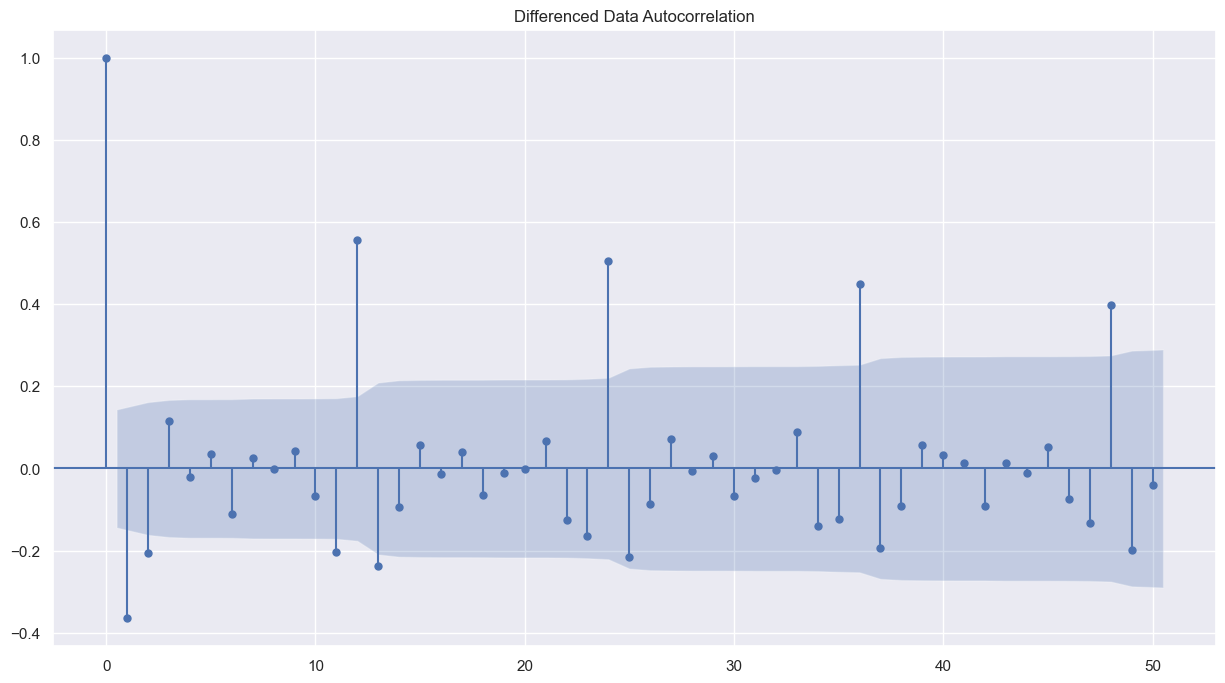

'Seasonality is observed for 6 and 12'

In [496]:
plot_acf(rdf["Rose"].diff().dropna(),lags=50,title="Differenced Data Autocorrelation");
plt.show()

display("Seasonality is observed for 6 and 12")

In [497]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))] # seasonal PDQ


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])




In [498]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = SARIMAX(train["Rose"],order=param, 
                               seasonal_order = param_seasonal,enforce_stationarity=False,
                               enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({"param":param,
                                        "seasonal":param_seasonal, 
                                        "AIC": results_SARIMA.aic},
                                       ignore_index=True)


In [499]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.220454
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


In [500]:
auto_SARIMA_6 = SARIMAX(train["Rose"].values,
                       order=(0,1,2),
                       seasonal_order=(2,0,2,6),
                       enforce_stationarity=False,
                       enforce_ivertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
display(results_auto_SARIMA_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -514.804
Date:                           Sun, 15 Aug 2021   AIC                           1043.608
Time:                                   19:16:47   BIC                           1062.884
Sample:                                        0   HQIC                          1051.433
                                           - 132                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7855      1.121     -0.701      0.483      -2.982       1.411
ma.L2         -0.2113      0.286     -0.739      0.460      -0.772       0.349
ar.S.L6       -0.0727      0.037     -1.972      0.049      -0.145      -0.000
ar.S.L12       0.8368      0.042     19.859      0.000       0.754       0.919
ma.S.L6        0.2230     13.328      0.017      0.987     -25.899      26.345
ma.S.L12      -0.7757     10.376     -0.075      0.940     -21.112      19.560
sigma2       348.6267   4636.610      0.075      0.940   -8738.962    9436.216
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                90.79
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.37
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction on the Test Set and Evaluation

In [501]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

display(predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head())

rmse_autosarima6 = rmse(test["Rose"], predicted_auto_SARIMA_6.predicted_mean)
display(rmse_autosarima6)

temp_resultsDf = pd.DataFrame({"Test RMSE" : [rmse_autosarima6]}, index = ["SARIMA(0,1,2)(2,0,2,6)"])
resultsDf = pd.concat([resultsDf, temp_resultsDf])

display(resultsDf)


y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,69.069584,19.191843,31.454262,106.684905
1,67.815724,19.664604,29.273809,106.357639
2,76.132646,19.655994,37.607607,114.657686
3,71.774607,19.656086,33.249387,110.299826
4,76.560597,19.656179,38.035194,115.086000


27.366827145873856

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
"Alpha=0.102,SimpleExponentialSmoothing",36.796242
"Alpha=0.9,SimpleExponentialSmoothing",47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


## SARIMA for 12 Seasonality

In [502]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])


In [503]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model =SARIMAX(train["Rose"],
                                            order=param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({"param":param,
                                        "seasonal":param_seasonal, 
                                        "AIC": results_SARIMA.aic},
                                       ignore_index=True)

In [504]:
SARIMA_AIC.sort_values(by=["AIC"]).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.871767
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668799
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [505]:
auto_SARIMA_12 =SARIMAX(train["Rose"],
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)

display(results_auto_SARIMA_12.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 15 Aug 2021   AIC                            887.938
Time:                                    19:18:18   BIC                            906.448
Sample:                                01-31-1980   HQIC                           895.437
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.844     -0.004      0.996    -372.930     371.245
ma.L2         -0.1573     29.826     -0.005      0.996     -58.614      58.300
ar.S.L12       0.3467      0.079      4.375      0.000       0.191       0.502
ar.S.L24       0.3023      0.076      3.996      0.000       0.154       0.451
ma.S.L12       0.0767      0.133      0.577      0.564      -0.184       0.337
ma.S.L24      -0.0726      0.146     -0.498      0.618      -0.358       0.213
sigma2       251.3137   4.77e+04      0.005      0.996   -9.33e+04    9.38e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.75   Prob(JB):                         0.31
Heteroskedasticity (H):               0.88   Skew:                             0.37
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set and Evaluation

In [506]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

display(predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head())

rmse_autosarima12 = rmse(test["Rose"], predicted_auto_SARIMA_12.predicted_mean)

display("RMSE", rmse_autosarima12)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_autosarima12]}, index=['SARIMA(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

display(resultsDf)


Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,62.867264,15.928501,31.647976,94.086552
1991-02-28,70.541190,16.147659,38.892360,102.190020
1991-03-31,77.356411,16.147656,45.707586,109.005236
1991-04-30,76.208814,16.147656,44.559989,107.857639
1991-05-31,72.747398,16.147656,41.098573,104.396223


'RMSE'

26.928361755113336

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
"Alpha=0.102,SimpleExponentialSmoothing",36.796242
"Alpha=0.9,SimpleExponentialSmoothing",47.504821
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


## Manual SARIMA model - Best Params seleced from ACF and PACF plots - Seasonality 6

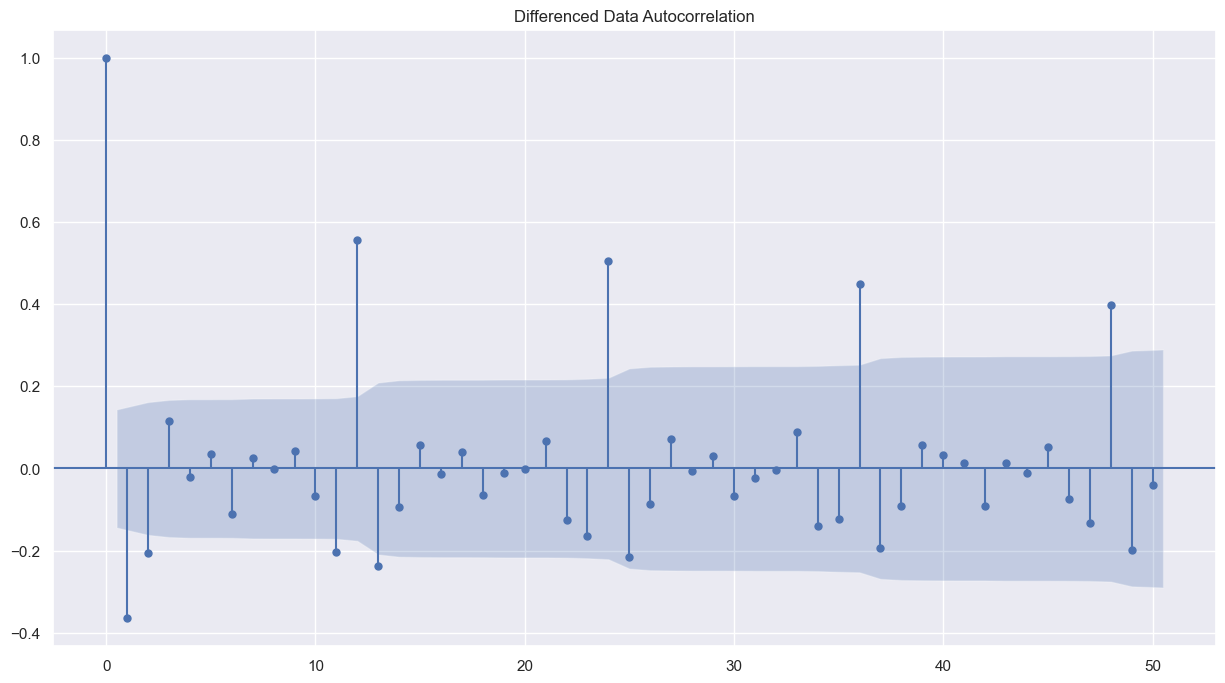

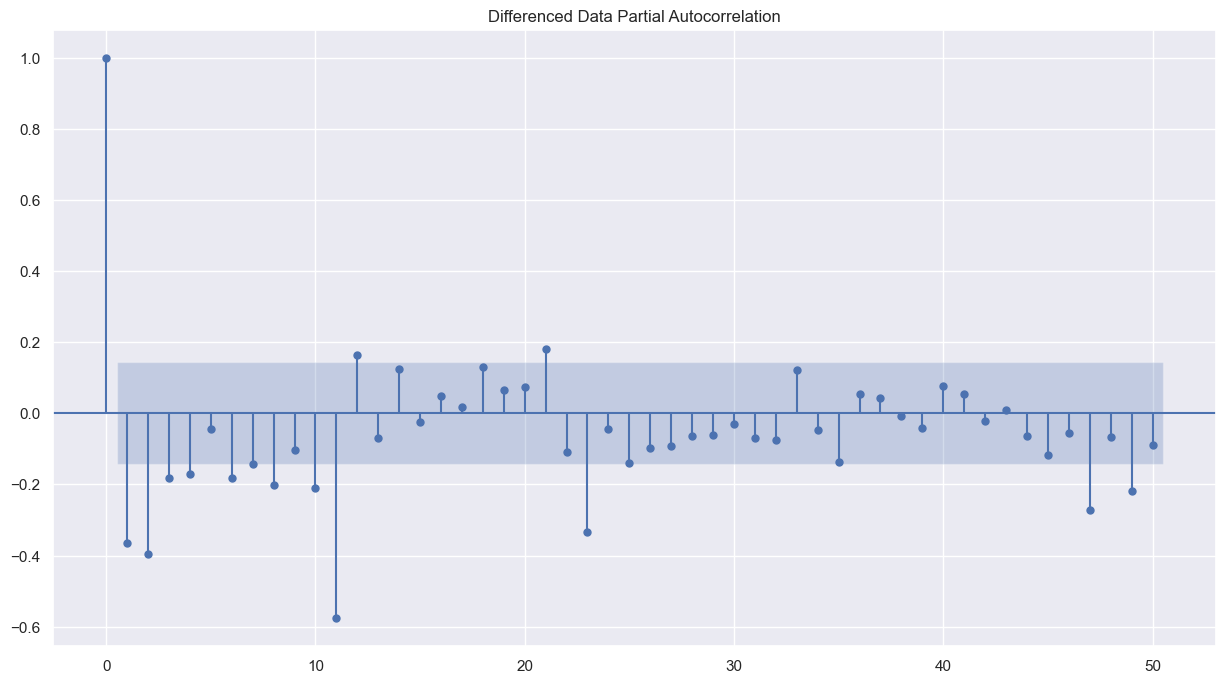

In [507]:
plot_acf(rdf["Rose"].diff().dropna(), lags=50, title="Differenced Data Autocorrelation")
plot_pacf(rdf["Rose"].diff().dropna(), lags=50, title="Differenced Data Partial Autocorrelation")

plt.show()

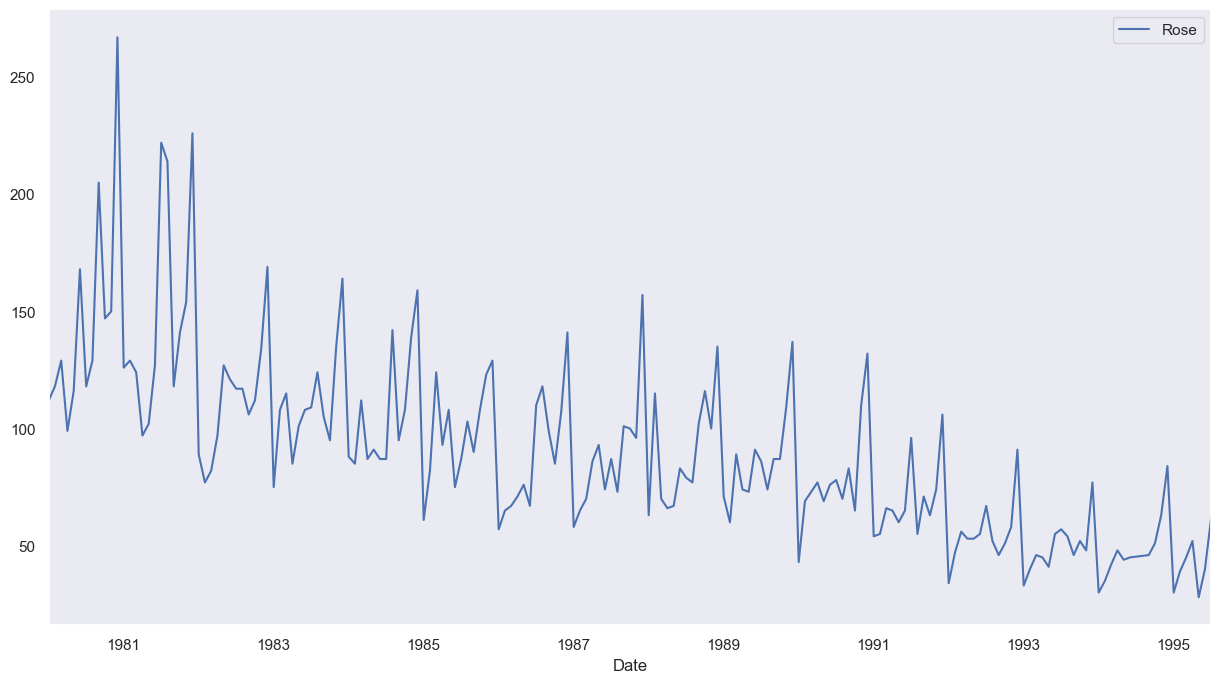

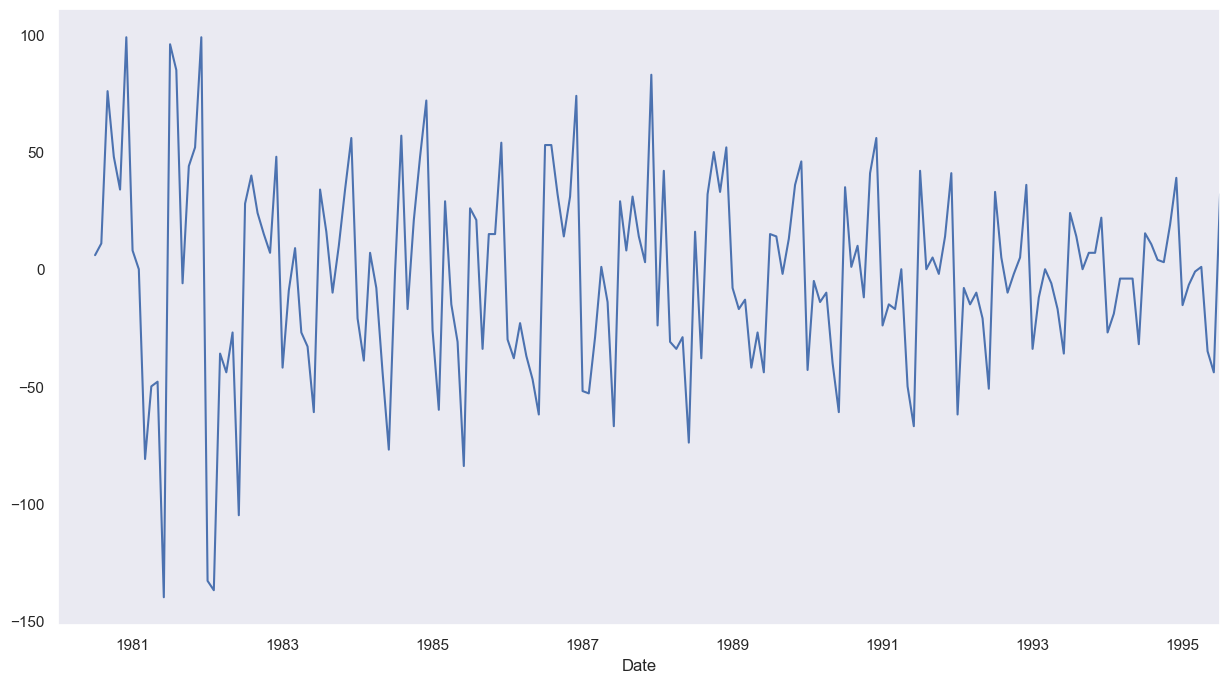

In [508]:
rdf.plot()
plt.grid()
plt.show()

(rdf["Rose"].diff(6)).plot()
plt.grid()
plt.show()

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

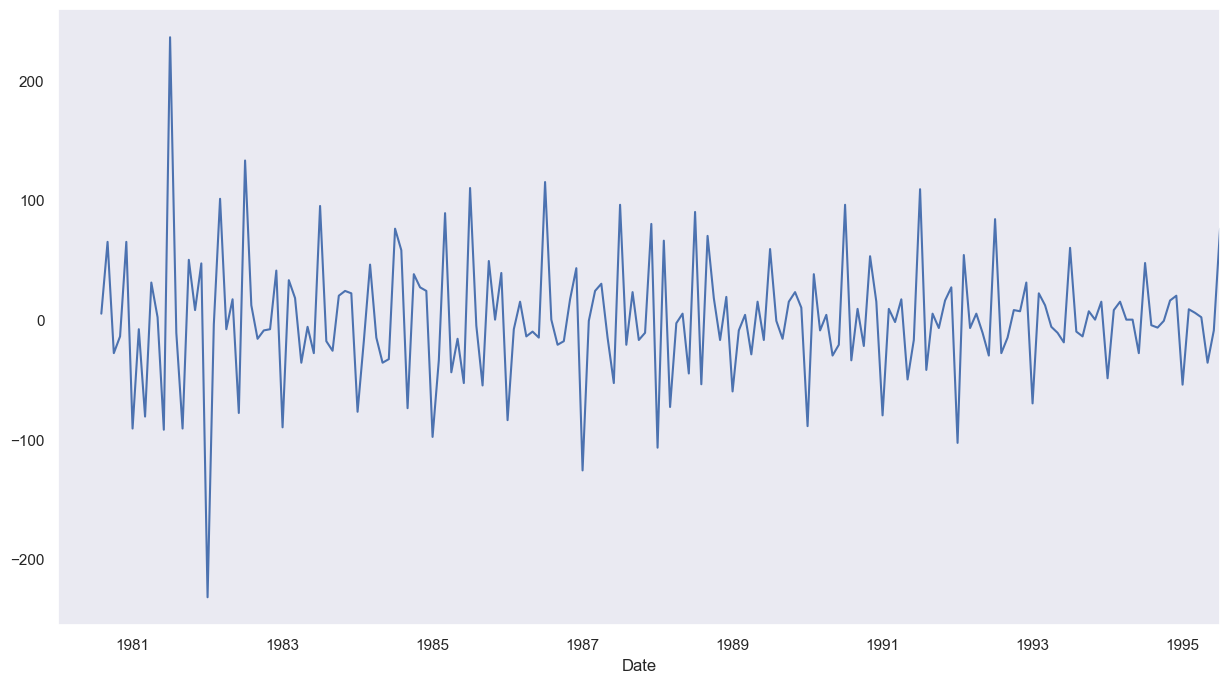

In [509]:
(rdf["Rose"].diff(6)).diff().plot()
plt.grid()
plt.show()

In [510]:
pValue = adfuller(train["Rose"])[1]

print("P value: ",pValue, " is greater than 0.05, there by H0 - Series in Not-Stationary is rejected")

P value:  0.21947564129072383  is greater than 0.05, there by H0 - Series in Not-Stationary is rejected


check the stationarity of the above series before fitting the SARIMA model.

In [511]:
# adfuller((train["Rose"].diff(6).dropna()).diff(1).dropna())[1]

Checking the ACF and the PACF plots for the new modified Time Series.

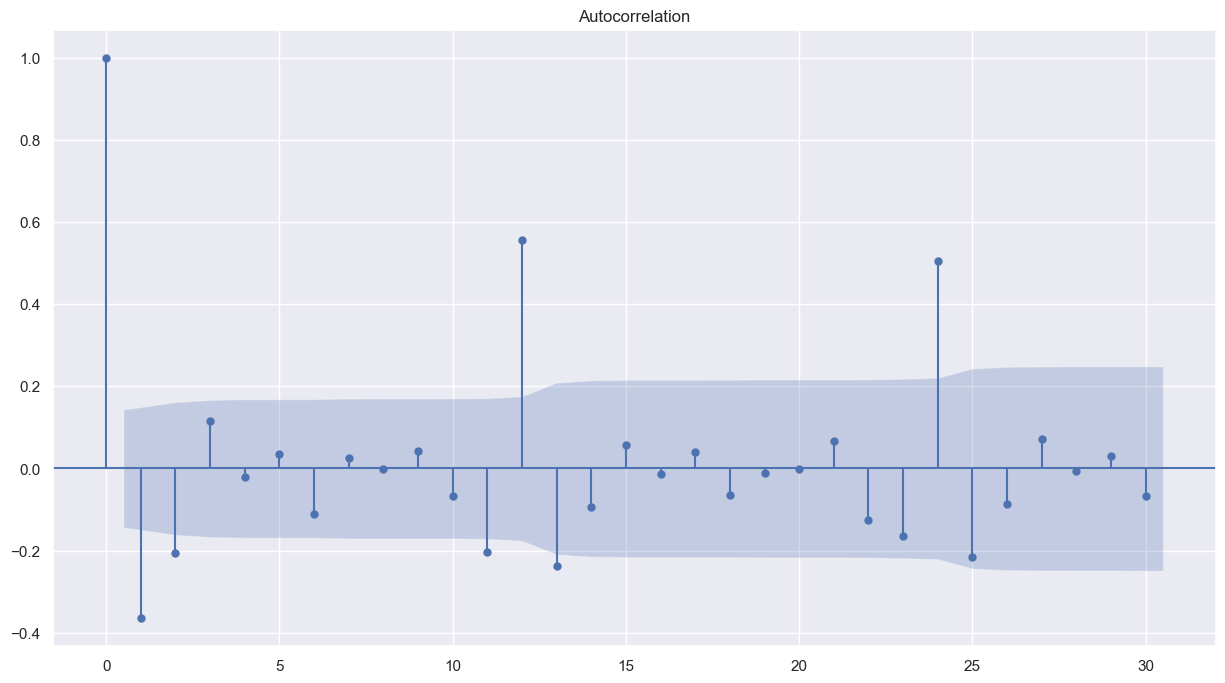

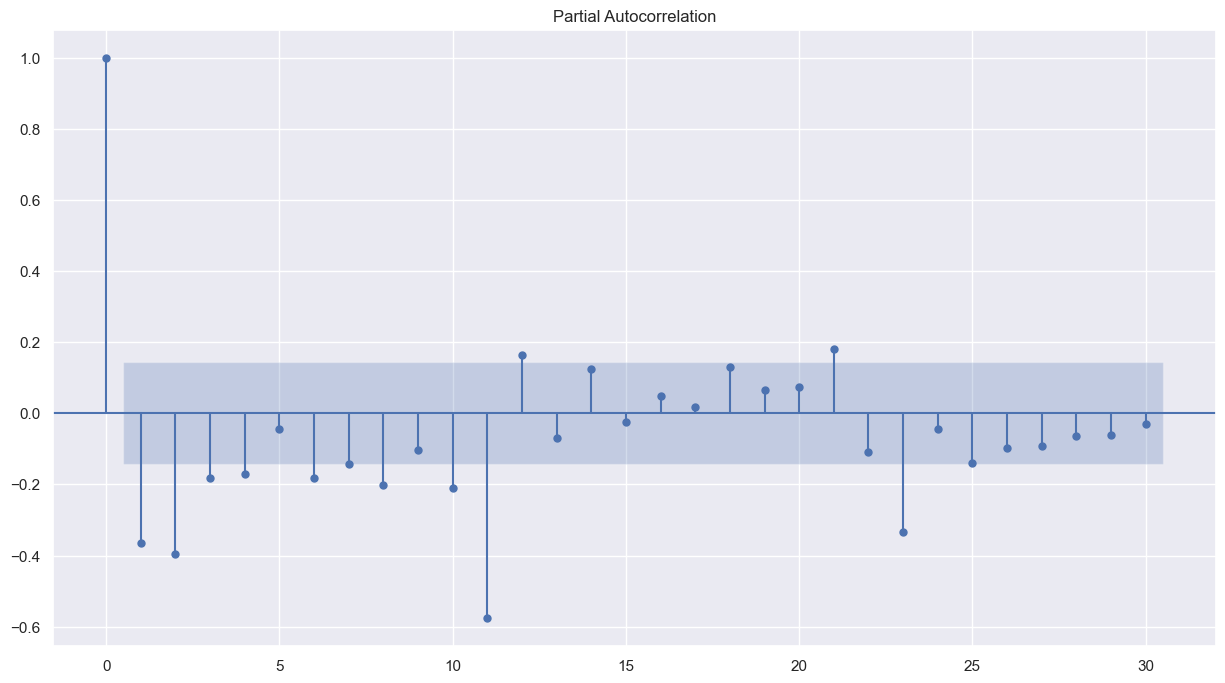

In [512]:
# plot_acf((rdf["Rose"].diff(6).dropna()).diff(1).dropna(), lags=30)
# plot_pacf((rdf["Rose"].diff(6).dropna()).diff(1).dropna(), lags=30)
# plt.show()

plot_acf(rdf["Rose"].diff().dropna(), lags=30)
plot_pacf(rdf["Rose"].diff().dropna(), lags=30)
plt.show()

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(0) and q(0) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2. 

In [513]:
manual_SARIMA_6 = SARIMAX(train["Rose"],
                         order=(4,1,2),
                         seasonal_order=(4,1,2,6),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
display(results_manual_SARIMA_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 6)   Log Likelihood                -414.552
Date:                           Sun, 15 Aug 2021   AIC                            855.105
Time:                                   19:18:57   BIC                            888.576
Sample:                               01-31-1980   HQIC                           868.639
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5124      0.415     -1.235      0.217      -1.326       0.301
ar.L2         -0.4283      0.251     -1.709      0.087      -0.919       0.063
ar.L3         -0.4016      0.174     -2.306      0.021      -0.743      -0.060
ar.L4         -0.2521      0.159     -1.585      0.113      -0.564       0.060
ma.L1         92.5149      6.414     14.424      0.000      79.944     105.086
ma.L2        -14.9539     41.773     -0.358      0.720     -96.828      66.921
ar.S.L6       -0.8359      0.597     -1.400      0.161      -2.006       0.334
ar.S.L12      -0.2682      0.627     -0.428      0.669      -1.497       0.960
ar.S.L18      -0.1801      0.292     -0.616      0.538      -0.753       0.393
ar.S.L24       0.0807      0.183      0.442      0.658      -0.277       0.438
ma.S.L6       -8.7342     15.713     -0.556      0.578     -39.530      22.062
ma.S.L12      29.5035      6.005      4.913      0.000      17.733      41.274
sigma2      4.015e-05   1.52e-05      2.641      0.008    1.03e-05       7e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 3.18
Prob(Q):                              0.77   Prob(JB):                         0.20
Heteroskedasticity (H):               0.73   Skew:                             0.37
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.6e+17. Standard errors may be unstable.
"""

In [514]:
manual_SARIMA_12 = SARIMAX(train["Rose"],
                         order=(4,1,2),
                         seasonal_order=(4,1,2,12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
display(results_manual_SARIMA_12.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -277.661
Date:                            Sun, 15 Aug 2021   AIC                            581.322
Time:                                    19:19:17   BIC                            609.983
Sample:                                01-31-1980   HQIC                           592.663
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9743      0.199     -4.900      0.000      -1.364      -0.585
ar.L2         -0.1123      0.285     -0.394      0.693      -0.670       0.446
ar.L3         -0.1044      0.277     -0.377      0.706      -0.647       0.438
ar.L4         -0.1285      0.162     -0.794      0.427      -0.446       0.189
ma.L1          0.1605    174.275      0.001      0.999    -341.413     341.734
ma.L2         -0.8395    146.327     -0.006      0.995    -287.634     285.955
ar.S.L12      -0.1443      0.364     -0.396      0.692      -0.858       0.569
ar.S.L24      -0.3596      0.227     -1.587      0.113      -0.804       0.085
ar.S.L36      -0.2153      0.106     -2.040      0.041      -0.422      -0.008
ar.S.L48      -0.1195      0.093     -1.281      0.200      -0.302       0.063
ma.S.L12      -0.5157      0.343     -1.502      0.133      -1.189       0.157
ma.S.L24       0.2084      0.373      0.558      0.577      -0.523       0.940
sigma2       215.3499   3.75e+04      0.006      0.995   -7.34e+04    7.38e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.41
Prob(Q):                              0.86   Prob(JB):                         0.30
Heteroskedasticity (H):               0.49   Skew:                             0.32
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction on the Test Set and Evaluation

In [515]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

display(predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head())


rmse_manualsarima6 = rmse(test["Rose"], predicted_manual_SARIMA_6.predicted_mean)
display(rmse_manualsarima6)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_manualsarima6]}, index=["SARIMA(4,1,2)(4,1,2,6)"])

resultsDf = pd.concat([resultsDf, temp_resultsDf])


predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

display(predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head())


rmse_manualsarima12 = rmse(test["Rose"], predicted_manual_SARIMA_12.predicted_mean)
display(rmse_manualsarima12)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_manualsarima12]}, index=["SARIMA(4,1,2)(4,1,2,12)"])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,55.125757,17.326517,21.166407,89.085106
1991-02-28,58.436911,18.284214,22.600510,94.273311
1991-03-31,69.979504,18.777280,33.176711,106.782297
1991-04-30,76.484663,19.021315,39.203570,113.765756
1991-05-31,71.735775,19.566637,33.385872,110.085678


19.6976473343888

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,46.384502,14.770602,17.434654,75.334349
1991-02-28,62.932609,14.989645,33.553445,92.311772
1991-03-31,63.527680,14.999316,34.129561,92.925800
1991-04-30,66.472991,15.179512,36.721694,96.224288
1991-05-31,63.540504,15.180389,33.787488,93.293520


17.528551143538984

# Build table with all the above models with RMSE scores

In [516]:
display(resultsDf.sort_values(by=["Test RMSE"],ascending=True))

,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialSmoothing",10.169599
2_point_trailing_Moving_Average,11.529278
4_point_trailing_Moving_Average,14.451403
6_point_trailing_Moving_Average,14.566327
9_point_trailing_Moving_Average,14.727630
RegressionOnTime,15.268955
"ARIMA(3,1,3)",15.987026
"SARIMA(4,1,2)(4,1,2,12)",17.528551
"SARIMA(4,1,2)(4,1,2,6)",19.697647
"Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExponentialSmoothing",21.224438


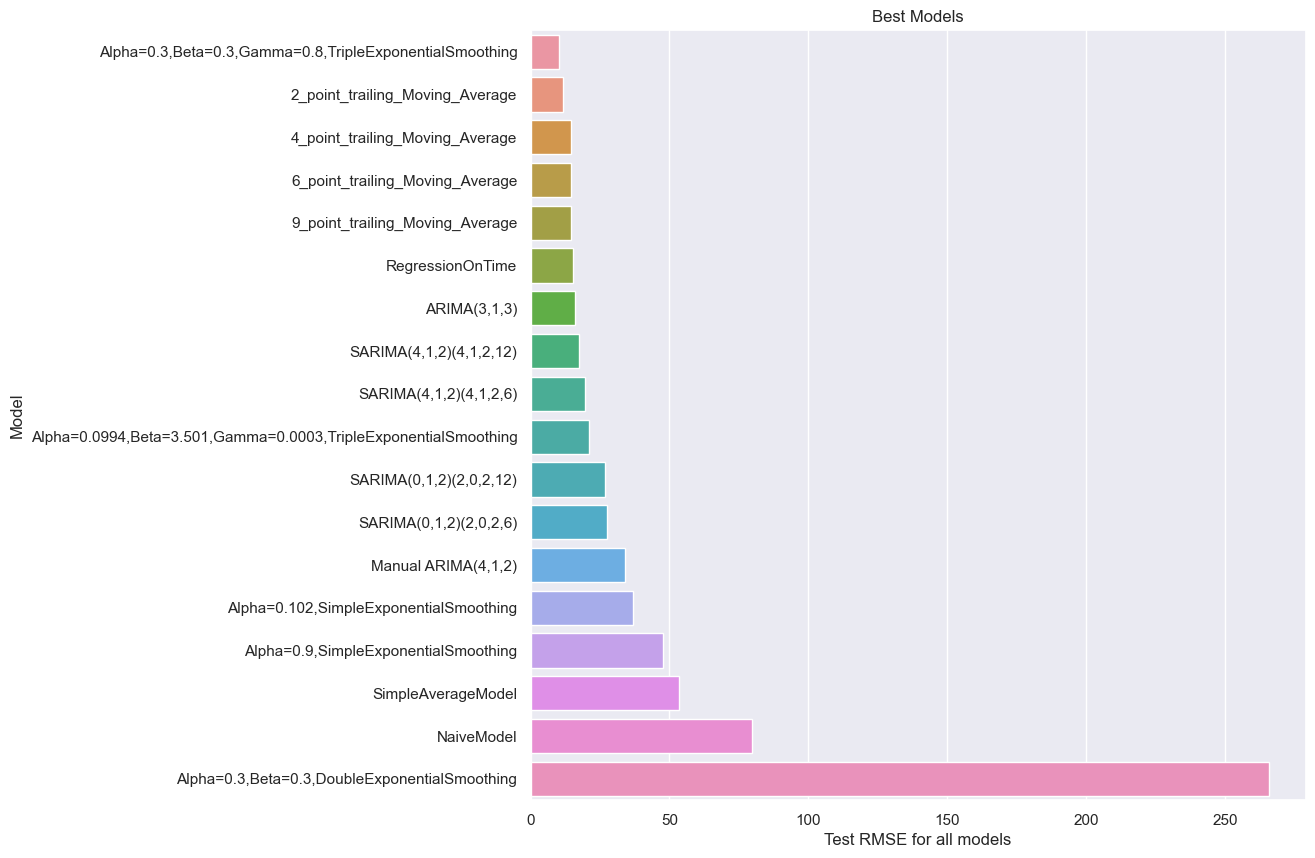

In [517]:
res_df = pd.DataFrame({'columns': resultsDf.index, 'Test RMSE': resultsDf["Test RMSE"]})
sorted_resDf_values = res_df.sort_values('Test RMSE', ascending=True)
plt.figure(figsize=(10,10))
sns.barplot(x='Test RMSE', y='columns', data=sorted_resDf_values)
plt.xlabel('Test RMSE for all models')
plt.ylabel('Model')
plt.title('Best Models')
plt.show()

## Build most optimum model on the Full Data

In [ ]:
fullmodel1 = ExponentialSmoothing(rdf,trend="additive",seasonal="multiplicative")
fullmodel1= fullmodel1.fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.4)


# Use optimal model with lowest RMSE to predict 12 months into future with a plot and confidence intervals

'Full model RMSE'

21.01321947940308

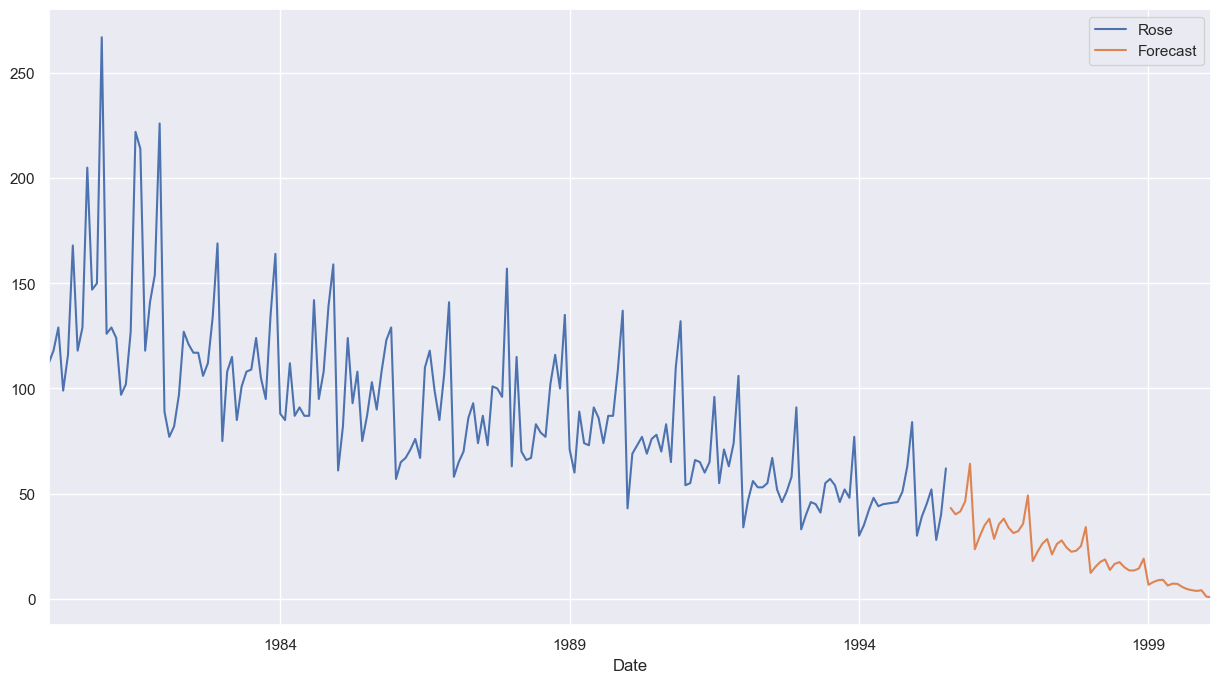

In [523]:

RMSE_fullmodel1 = rmse(rdf["Rose"], fullmodel1.fittedvalues)
display("Full model RMSE", RMSE_fullmodel1)

prediction_1 = fullmodel1.forecast(steps=len(test))

rdf.plot(legend=True, label="Actual")
prediction_1.plot(legend=True, label="Forecast")

plt.show()


,lower_CI,prediction,upper_ci
1995-08-31 00:00:00,1.908255,43.170624,84.432992
1995-09-30 00:00:00,-1.119912,40.142457,81.404826
1995-10-31 00:00:00,0.300036,41.562405,82.824774
1995-11-30 00:00:00,5.032775,46.295144,87.557513
1995-12-31 00:00:00,22.929432,64.191801,105.454170


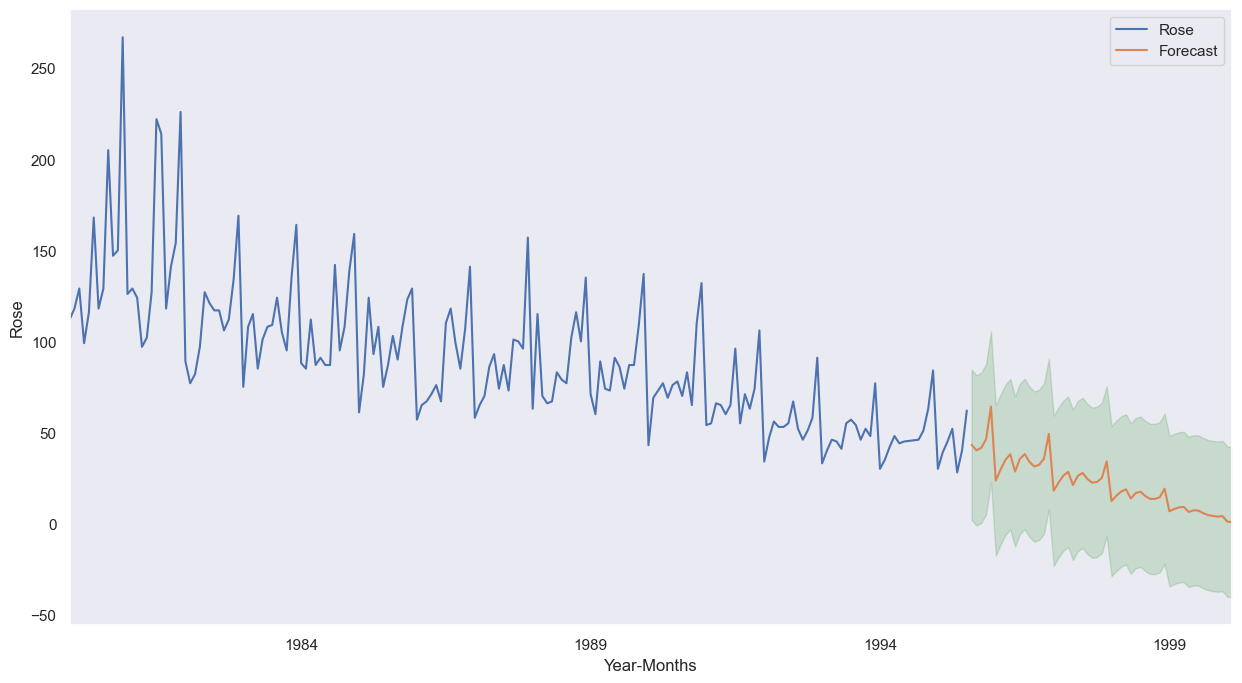

In [524]:
pred_1_df = pd.DataFrame({"lower_CI":prediction_1 - 1.96*fullmodel1.resid.std(),
                          "prediction":prediction_1,
                          "upper_ci": prediction_1 + 1.96*fullmodel1.resid.std()})
display(pred_1_df.head().style)


axis = rdf.plot(label="Actual", figsize=(15,8))
pred_1_df["prediction"].plot(ax=axis, label="Forecast", alpha=1) # alpha here is for transparency of the prediction line

axis.fill_between(pred_1_df.index, pred_1_df["lower_CI"], pred_1_df["upper_ci"], color="green", alpha=.15) # alpha here denotes the transparency of the shaded region

axis.set_xlabel("Year-Months")
axis.set_ylabel("Rose")
plt.legend(loc="best")
plt.grid()
plt.show();
